<a href="https://colab.research.google.com/github/Tar-ive/simulations/blob/main/ios_android.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Round 20
Ed: Rounds #1 - #20: [Avg Price: 1.50, Avg Demand: 1345.52, Avg Profit: -774.46]
Gill: Rounds #1 - #20: [Avg Price: 2.45, Avg Demand: 1059.22, Avg Profit: 418.45]

Round 40
Ed: Rounds #21 - #40: [Avg Price: 1.23, Avg Demand: 1229.61, Avg Profit: -971.55]
Gill: Rounds #21 - #40: [Avg Price: 0.76, Avg Demand: 1371.36, Avg Profit: -1718.52]

Round 60
Ed: Rounds #41 - #60: [Avg Price: 3.26, Avg Demand: 779.59, Avg Profit: 801.09]
Gill: Rounds #41 - #60: [Avg Price: 0.31, Avg Demand: 1663.72, Avg Profit: -2823.18]

Round 80
Ed: Rounds #61 - #80: [Avg Price: 2.67, Avg Demand: 891.06, Avg Profit: 509.02]
Gill: Rounds #61 - #80: [Avg Price: 0.26, Avg Demand: 1615.89, Avg Profit: -2821.06]

Round 100
Ed: Rounds #81 - #100: [Avg Price: 1.11, Avg Demand: 1247.21, Avg Profit: -1133.09]
Gill: Rounds #81 - #100: [Avg Price: 0.70, Avg Demand: 1371.43, Avg Profit: -1799.35]

Round 120
Ed: Rounds #101 - #120: [Avg Price: 0.37, Avg Demand: 1498.24, Avg Profit: -2451.24]
Gill: Rounds #101 - #120

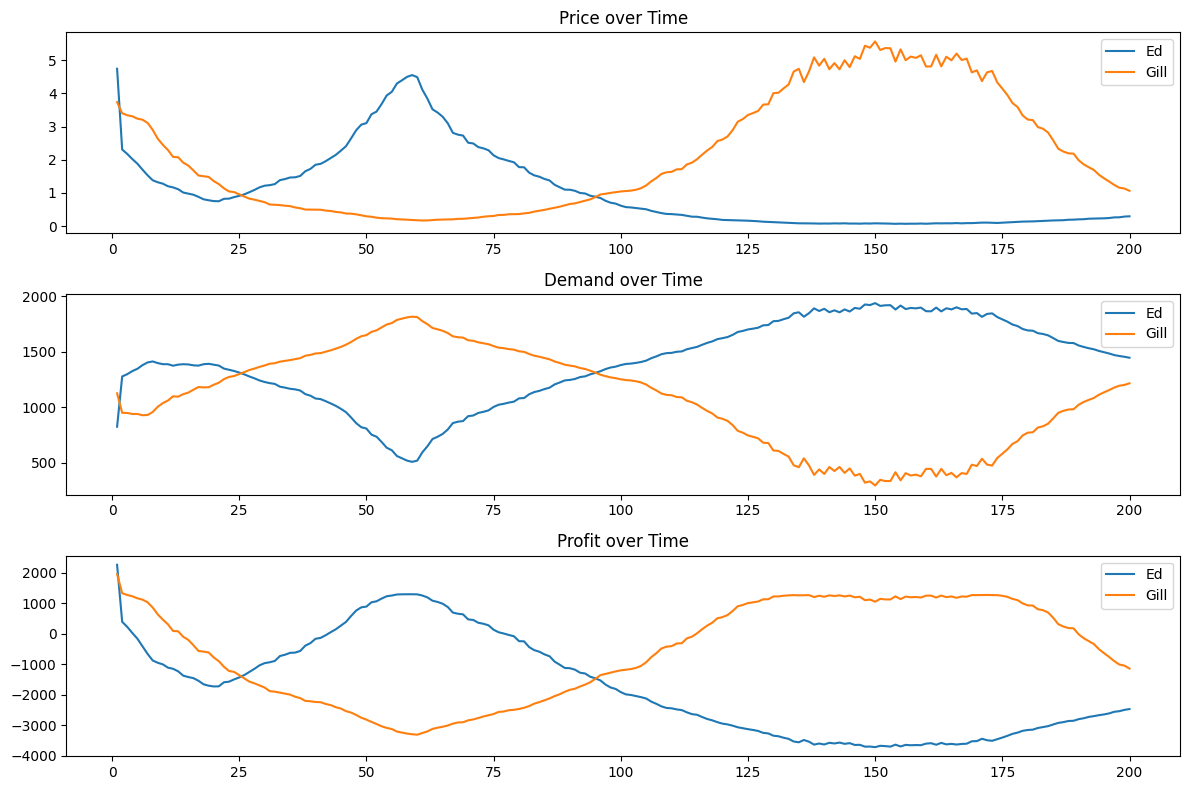

In [ ]:
import random
import matplotlib.pyplot as plt

class Firm:
    def __init__(self, name, cost):
        self.name = name
        self.cost = cost
        self.price = cost
        self.demand = 0
        self.profit = 0
        self.history = []

    def set_price(self, price):
        self.price = price

    def update_history(self):
        self.history.append((self.price, self.demand, self.profit))

class Market:
    def __init__(self):
        self.firm1 = Firm("Ed", 2)
        self.firm2 = Firm("Gill", 2)
        self.round = 0

    def calculate_demand(self):
        self.firm1.demand = 1400 - 200 * self.firm1.price + 100 * self.firm2.price
        self.firm2.demand = 1400 - 200 * self.firm2.price + 100 * self.firm1.price

    def calculate_profit(self):
        self.firm1.profit = (self.firm1.price - self.firm1.cost) * self.firm1.demand
        self.firm2.profit = (self.firm2.price - self.firm2.cost) * self.firm2.demand

    def run_round(self):
        self.round += 1
        self.calculate_demand()
        self.calculate_profit()
        self.firm1.update_history()
        self.firm2.update_history()

    def get_summary(self, firm, last_n=20):
        history = firm.history[-last_n:]
        avg_price = sum(h[0] for h in history) / len(history)
        avg_demand = sum(h[1] for h in history) / len(history)
        avg_profit = sum(h[2] for h in history) / len(history)
        return f"Rounds #{self.round-last_n+1} - #{self.round}: [Avg Price: {avg_price:.2f}, Avg Demand: {avg_demand:.2f}, Avg Profit: {avg_profit:.2f}]"

def simple_ai(market, firm, opponent):
    # A simple AI that adjusts price based on profit changes
    if len(firm.history) < 2:
        return random.uniform(firm.cost, 8)  # Random price between cost and monopoly price

    last_profit = firm.history[-1][2]
    prev_profit = firm.history[-2][2]
    last_price = firm.history[-1][0]

    if last_profit > prev_profit:
        return last_price * random.uniform(1, 1.1)  # Increase price by up to 10%
    else:
        return last_price * random.uniform(0.9, 1)  # Decrease price by up to 10%

def run_simulation(num_rounds=200):
    market = Market()

    for _ in range(num_rounds):
        price1 = simple_ai(market, market.firm1, market.firm2)
        price2 = simple_ai(market, market.firm2, market.firm1)

        market.firm1.set_price(price1)
        market.firm2.set_price(price2)
        market.run_round()

        if market.round % 20 == 0:
            print(f"Round {market.round}")
            print(f"{market.firm1.name}: {market.get_summary(market.firm1)}")
            print(f"{market.firm2.name}: {market.get_summary(market.firm2)}")
            print()

    return market

def plot_results(market):
    rounds = range(1, len(market.firm1.history) + 1)

    plt.figure(figsize=(12, 8))

    plt.subplot(3, 1, 1)
    plt.plot(rounds, [h[0] for h in market.firm1.history], label=market.firm1.name)
    plt.plot(rounds, [h[0] for h in market.firm2.history], label=market.firm2.name)
    plt.title('Price over Time')
    plt.legend()

    plt.subplot(3, 1, 2)
    plt.plot(rounds, [h[1] for h in market.firm1.history], label=market.firm1.name)
    plt.plot(rounds, [h[1] for h in market.firm2.history], label=market.firm2.name)
    plt.title('Demand over Time')
    plt.legend()

    plt.subplot(3, 1, 3)
    plt.plot(rounds, [h[2] for h in market.firm1.history], label=market.firm1.name)
    plt.plot(rounds, [h[2] for h in market.firm2.history], label=market.firm2.name)
    plt.title('Profit over Time')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Run the simulation
final_market = run_simulation(200)

# Plot the results
plot_results(final_market)

Round 20
Android: Rounds #1 - #20: [Avg Price: 1.23, Avg Demand: 724914.73, Avg Profit: -557272.38]
iOS: Rounds #1 - #20: [Avg Price: 0.46, Avg Demand: 275100.78, Avg Profit: -424779.10]

Round 40
Android: Rounds #21 - #40: [Avg Price: 0.07, Avg Demand: 724992.47, Avg Profit: -1400354.76]
iOS: Rounds #21 - #40: [Avg Price: 0.00, Avg Demand: 275008.90, Avg Profit: -550017.76]

Round 60
Android: Rounds #41 - #60: [Avg Price: 0.00, Avg Demand: 724999.60, Avg Profit: -1447347.28]
iOS: Rounds #41 - #60: [Avg Price: 0.00, Avg Demand: 275000.48, Avg Profit: -550000.95]

Round 80
Android: Rounds #61 - #80: [Avg Price: 0.00, Avg Demand: 724999.98, Avg Profit: -1449854.73]
iOS: Rounds #61 - #80: [Avg Price: 0.00, Avg Demand: 275000.03, Avg Profit: -550000.05]

Round 100
Android: Rounds #81 - #100: [Avg Price: 0.00, Avg Demand: 725000.00, Avg Profit: -1449992.27]
iOS: Rounds #81 - #100: [Avg Price: 0.00, Avg Demand: 275000.00, Avg Profit: -550000.00]

Round 120
Android: Rounds #101 - #120: [Avg P

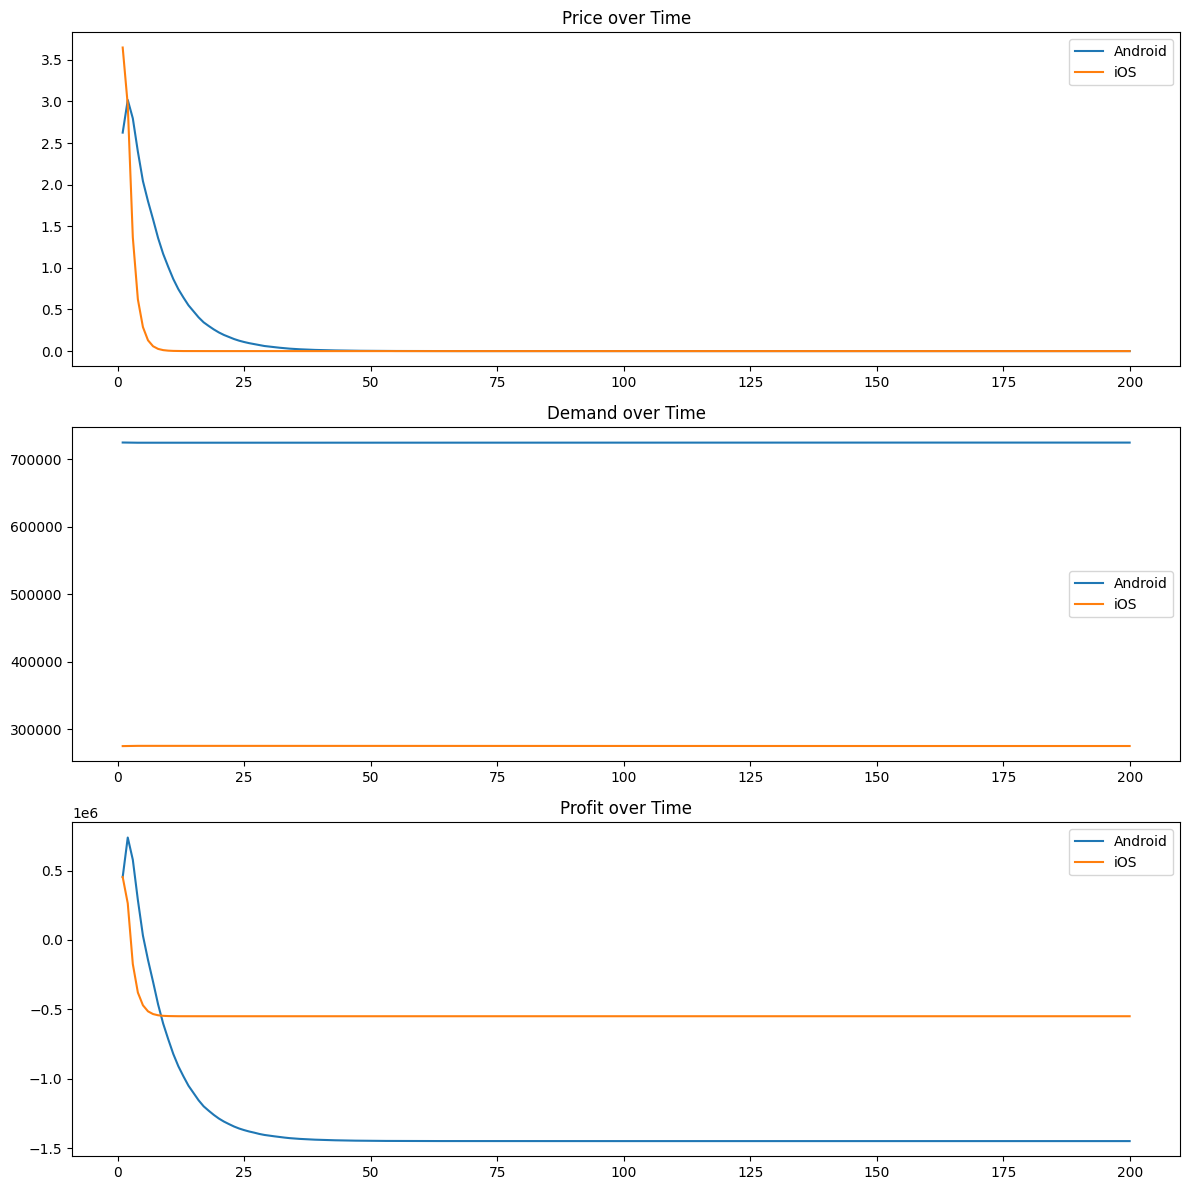


Final Statistics:
Android: Price = 0.00, Demand = 725000.00, Profit = -1450000.00
iOS: Price = 0.00, Demand = 275000.00, Profit = -550000.00


In [ ]:
import random
import matplotlib.pyplot as plt
import pandas as pd
import io

# CSV data as strings
app_store_revenue_csv = """
Year,Google Play,App Store
2021,47,85
2022,45,92
2023,51,108
2024,58,124
2025,65,142
2026,72,161
"""

key_statistics_csv = """
Metric,Android,iOS
Global market share,72.5,27.5
US market share,40.09,59.71
Average annual income of users,61000,85000
Average app size,14.8,34.3
Average smartphone price (2021),269,729
Daily time spent on device (minutes),222,294
Loyalty rate,89,87
Users making in-app purchases (2020),29,42
Average number of apps downloaded,60,60
Percentage of free apps on store,70,70
Daily app downloads,2800000,1450000
"""

market_share_csv = """
Year,Android Users,iOS Users,Android Share,iOS Share
2024,3.9,1.46,69.88,29.39
2023,3.6,1.36,70.26,29.02
2022,3.3,1.27,71.47,27.85
2021,3.0,1.23,71.89,27.34
2020,2.8,1.04,73.06,26.28
2019,2.5,0.95,75.47,22.71
2018,2.3,0.89,75.45,20.47
2017,2.0,0.81,72.63,19.65
2016,1.7,0.71,69.11,19.29
2015,1.4,0.57,64.20,20.20
"""

# Load CSV data into pandas DataFrames
app_store_revenue_df = pd.read_csv(io.StringIO(app_store_revenue_csv.strip()))
key_statistics_df = pd.read_csv(io.StringIO(key_statistics_csv.strip()))
market_share_df = pd.read_csv(io.StringIO(market_share_csv.strip()))

class Firm:
    def __init__(self, name, cost, market_share, avg_income, loyalty_rate):
        self.name = name
        self.cost = cost
        self.price = cost
        self.demand = 0
        self.profit = 0
        self.history = []
        self.market_share = market_share
        self.avg_income = avg_income
        self.loyalty_rate = loyalty_rate

    def set_price(self, price):
        self.price = price

    def update_history(self):
        self.history.append((self.price, self.demand, self.profit))

class Market:
    def __init__(self):
        android_stats = key_statistics_df[key_statistics_df['Metric'].isin(['Global market share', 'Average annual income of users', 'Loyalty rate'])]
        ios_stats = android_stats.copy()
        ios_stats['Android'] = android_stats['iOS']
        ios_stats['iOS'] = android_stats['Android']

        self.firm1 = Firm("Android", 2, float(android_stats[android_stats['Metric'] == 'Global market share']['Android'].values[0]),
                          float(android_stats[android_stats['Metric'] == 'Average annual income of users']['Android'].values[0]),
                          float(android_stats[android_stats['Metric'] == 'Loyalty rate']['Android'].values[0]))
        self.firm2 = Firm("iOS", 2, float(ios_stats[ios_stats['Metric'] == 'Global market share']['Android'].values[0]),
                          float(ios_stats[ios_stats['Metric'] == 'Average annual income of users']['Android'].values[0]),
                          float(ios_stats[ios_stats['Metric'] == 'Loyalty rate']['Android'].values[0]))
        self.round = 0

    def calculate_demand(self):
        total_market = 1000000  # Assume a total market of 1 million users
        price_sensitivity = 0.001  # Adjust this value to change how sensitive demand is to price

        # Calculate base demand based on market share
        base_demand1 = total_market * (self.firm1.market_share / 100)
        base_demand2 = total_market * (self.firm2.market_share / 100)

        # Adjust demand based on price difference and loyalty
        price_diff = self.firm1.price - self.firm2.price
        demand_shift = price_diff * price_sensitivity * total_market

        self.firm1.demand = max(0, base_demand1 - demand_shift * (1 - self.firm1.loyalty_rate / 100))
        self.firm2.demand = max(0, base_demand2 + demand_shift * (1 - self.firm2.loyalty_rate / 100))

    def calculate_profit(self):
        self.firm1.profit = (self.firm1.price - self.firm1.cost) * self.firm1.demand
        self.firm2.profit = (self.firm2.price - self.firm2.cost) * self.firm2.demand

    def run_round(self):
        self.round += 1
        self.calculate_demand()
        self.calculate_profit()
        self.firm1.update_history()
        self.firm2.update_history()

    def get_summary(self, firm, last_n=20):
        history = firm.history[-last_n:]
        avg_price = sum(h[0] for h in history) / len(history)
        avg_demand = sum(h[1] for h in history) / len(history)
        avg_profit = sum(h[2] for h in history) / len(history)
        return f"Rounds #{self.round-last_n+1} - #{self.round}: [Avg Price: {avg_price:.2f}, Avg Demand: {avg_demand:.2f}, Avg Profit: {avg_profit:.2f}]"

def ai_strategy(market, firm, opponent):
    if len(firm.history) < 2:
        return random.uniform(firm.cost, firm.cost * 2)  # Start with a price between cost and 2x cost

    last_profit = firm.history[-1][2]
    prev_profit = firm.history[-2][2]
    last_price = firm.history[-1][0]

    # Consider market share and average income in pricing strategy
    market_factor = firm.market_share / 100  # Higher market share allows for higher prices
    income_factor = firm.avg_income / 50000  # Higher average income allows for higher prices

    if last_profit > prev_profit:
        # If profit increased, cautiously increase price
        return last_price * random.uniform(1, 1.05) * market_factor * income_factor
    else:
        # If profit decreased, more aggressively decrease price
        return last_price * random.uniform(0.95, 1) * market_factor * income_factor

def run_simulation(num_rounds=200):
    market = Market()

    for _ in range(num_rounds):
        price1 = ai_strategy(market, market.firm1, market.firm2)
        price2 = ai_strategy(market, market.firm2, market.firm1)

        market.firm1.set_price(price1)
        market.firm2.set_price(price2)
        market.run_round()

        if market.round % 20 == 0:
            print(f"Round {market.round}")
            print(f"{market.firm1.name}: {market.get_summary(market.firm1)}")
            print(f"{market.firm2.name}: {market.get_summary(market.firm2)}")
            print()

    return market

def plot_results(market):
    rounds = range(1, len(market.firm1.history) + 1)

    plt.figure(figsize=(12, 12))

    plt.subplot(3, 1, 1)
    plt.plot(rounds, [h[0] for h in market.firm1.history], label=market.firm1.name)
    plt.plot(rounds, [h[0] for h in market.firm2.history], label=market.firm2.name)
    plt.title('Price over Time')
    plt.legend()

    plt.subplot(3, 1, 2)
    plt.plot(rounds, [h[1] for h in market.firm1.history], label=market.firm1.name)
    plt.plot(rounds, [h[1] for h in market.firm2.history], label=market.firm2.name)
    plt.title('Demand over Time')
    plt.legend()

    plt.subplot(3, 1, 3)
    plt.plot(rounds, [h[2] for h in market.firm1.history], label=market.firm1.name)
    plt.plot(rounds, [h[2] for h in market.firm2.history], label=market.firm2.name)
    plt.title('Profit over Time')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Run the simulation
final_market = run_simulation(200)

# Plot the results
plot_results(final_market)

# Display final statistics
print("\nFinal Statistics:")
print(f"Android: Price = {final_market.firm1.price:.2f}, Demand = {final_market.firm1.demand:.2f}, Profit = {final_market.firm1.profit:.2f}")
print(f"iOS: Price = {final_market.firm2.price:.2f}, Demand = {final_market.firm2.demand:.2f}, Profit = {final_market.firm2.profit:.2f}")

Round 20
Android: Rounds #1 - #20: [Avg Price: 2.58, Avg Demand: 710531.96, Avg Profit: 416577.87]
iOS: Rounds #1 - #20: [Avg Price: 2.38, Avg Demand: 276472.55, Avg Profit: 105401.70]

Round 40
Android: Rounds #21 - #40: [Avg Price: 2.20, Avg Demand: 720742.21, Avg Profit: 144148.44]
iOS: Rounds #21 - #40: [Avg Price: 2.20, Avg Demand: 276306.08, Avg Profit: 55261.22]

Round 60
Android: Rounds #41 - #60: [Avg Price: 2.20, Avg Demand: 723279.30, Avg Profit: 144655.86]
iOS: Rounds #41 - #60: [Avg Price: 2.20, Avg Demand: 280389.48, Avg Profit: 56077.90]

Round 80
Android: Rounds #61 - #80: [Avg Price: 2.20, Avg Demand: 715654.14, Avg Profit: 143130.83]
iOS: Rounds #61 - #80: [Avg Price: 2.20, Avg Demand: 278595.21, Avg Profit: 55719.04]

Round 100
Android: Rounds #81 - #100: [Avg Price: 2.20, Avg Demand: 722890.97, Avg Profit: 144578.19]
iOS: Rounds #81 - #100: [Avg Price: 2.20, Avg Demand: 272774.82, Avg Profit: 54554.96]

Round 120
Android: Rounds #101 - #120: [Avg Price: 2.20, Avg De

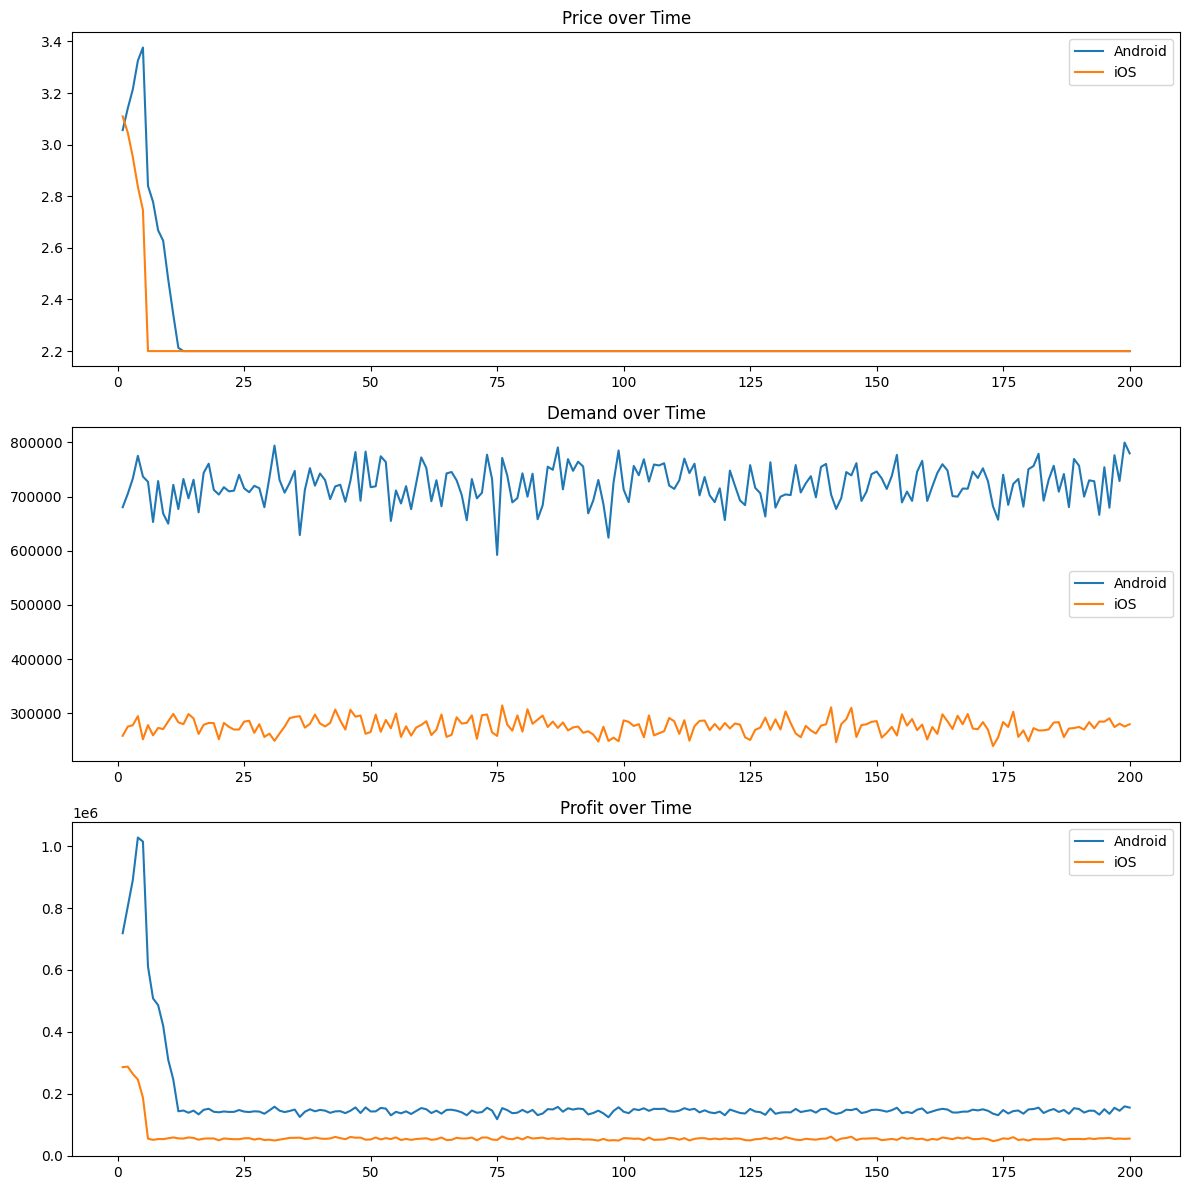


Final Statistics:
Android: Price = 2.20, Demand = 779906.47, Profit = 155981.29
iOS: Price = 2.20, Demand = 279641.19, Profit = 55928.24


In [ ]:
import random
import matplotlib.pyplot as plt
import pandas as pd
import io
import numpy as np

# CSV data (same as before)
app_store_revenue_csv = """
Year,Google Play,App Store
2021,47,85
2022,45,92
2023,51,108
2024,58,124
2025,65,142
2026,72,161
"""

key_statistics_csv = """
Metric,Android,iOS
Global market share,72.5,27.5
US market share,40.09,59.71
Average annual income of users,61000,85000
Average app size,14.8,34.3
Average smartphone price (2021),269,729
Daily time spent on device (minutes),222,294
Loyalty rate,89,87
Users making in-app purchases (2020),29,42
Average number of apps downloaded,60,60
Percentage of free apps on store,70,70
Daily app downloads,2800000,1450000
"""

market_share_csv = """
Year,Android Users,iOS Users,Android Share,iOS Share
2024,3.9,1.46,69.88,29.39
2023,3.6,1.36,70.26,29.02
2022,3.3,1.27,71.47,27.85
2021,3.0,1.23,71.89,27.34
2020,2.8,1.04,73.06,26.28
2019,2.5,0.95,75.47,22.71
2018,2.3,0.89,75.45,20.47
2017,2.0,0.81,72.63,19.65
2016,1.7,0.71,69.11,19.29
2015,1.4,0.57,64.20,20.20
"""

# Load CSV data into pandas DataFrames
app_store_revenue_df = pd.read_csv(io.StringIO(app_store_revenue_csv.strip()))
key_statistics_df = pd.read_csv(io.StringIO(key_statistics_csv.strip()))
market_share_df = pd.read_csv(io.StringIO(market_share_csv.strip()))

class Firm:
    def __init__(self, name, cost, market_share, avg_income, loyalty_rate):
        self.name = name
        self.cost = cost
        self.price = cost * 1.5  # Start with a 50% markup
        self.demand = 0
        self.profit = 0
        self.history = []
        self.market_share = market_share
        self.avg_income = avg_income
        self.loyalty_rate = loyalty_rate

    def set_price(self, price):
        self.price = max(self.cost, price)  # Ensure price is not below cost

    def update_history(self):
        self.history.append((self.price, self.demand, self.profit))

class Market:
    def __init__(self):
        android_stats = key_statistics_df[key_statistics_df['Metric'].isin(['Global market share', 'Average annual income of users', 'Loyalty rate'])]
        ios_stats = android_stats.copy()
        ios_stats['Android'] = android_stats['iOS']
        ios_stats['iOS'] = android_stats['Android']

        self.firm1 = Firm("Android", 2, float(android_stats[android_stats['Metric'] == 'Global market share']['Android'].values[0]),
                          float(android_stats[android_stats['Metric'] == 'Average annual income of users']['Android'].values[0]),
                          float(android_stats[android_stats['Metric'] == 'Loyalty rate']['Android'].values[0]))
        self.firm2 = Firm("iOS", 2, float(ios_stats[ios_stats['Metric'] == 'Global market share']['Android'].values[0]),
                          float(ios_stats[ios_stats['Metric'] == 'Average annual income of users']['Android'].values[0]),
                          float(ios_stats[ios_stats['Metric'] == 'Loyalty rate']['Android'].values[0]))
        self.round = 0

    def calculate_demand(self):
        total_market = 1000000  # Assume a total market of 1 million users
        price_sensitivity = 0.0005  # Reduced price sensitivity

        # Calculate base demand based on market share
        base_demand1 = total_market * (self.firm1.market_share / 100)
        base_demand2 = total_market * (self.firm2.market_share / 100)

        # Adjust demand based on price difference and loyalty
        price_diff = self.firm1.price - self.firm2.price
        demand_shift = price_diff * price_sensitivity * total_market

        # Add some random market fluctuation
        fluctuation1 = np.random.normal(0, 0.05 * base_demand1)
        fluctuation2 = np.random.normal(0, 0.05 * base_demand2)

        self.firm1.demand = max(0, base_demand1 - demand_shift * (1 - self.firm1.loyalty_rate / 100) + fluctuation1)
        self.firm2.demand = max(0, base_demand2 + demand_shift * (1 - self.firm2.loyalty_rate / 100) + fluctuation2)

    def calculate_profit(self):
        self.firm1.profit = (self.firm1.price - self.firm1.cost) * self.firm1.demand
        self.firm2.profit = (self.firm2.price - self.firm2.cost) * self.firm2.demand

    def run_round(self):
        self.round += 1
        self.calculate_demand()
        self.calculate_profit()
        self.firm1.update_history()
        self.firm2.update_history()

    def get_summary(self, firm, last_n=20):
        history = firm.history[-last_n:]
        avg_price = sum(h[0] for h in history) / len(history)
        avg_demand = sum(h[1] for h in history) / len(history)
        avg_profit = sum(h[2] for h in history) / len(history)
        return f"Rounds #{self.round-last_n+1} - #{self.round}: [Avg Price: {avg_price:.2f}, Avg Demand: {avg_demand:.2f}, Avg Profit: {avg_profit:.2f}]"

def ai_strategy(market, firm, opponent):
    if len(firm.history) < 5:
        return max(firm.cost, firm.price * random.uniform(0.95, 1.05))

    price_history = [h[0] for h in firm.history[-5:]]
    profit_history = [h[2] for h in firm.history[-5:]]

    avg_price = sum(price_history) / len(price_history)
    avg_profit = sum(profit_history) / len(profit_history)

    # Trend analysis
    price_trend = sum(price_history[i] - price_history[i-1] for i in range(1, len(price_history))) / (len(price_history) - 1)
    profit_trend = sum(profit_history[i] - profit_history[i-1] for i in range(1, len(profit_history))) / (len(profit_history) - 1)

    # Market factors
    market_factor = firm.market_share / 100
    income_factor = firm.avg_income / 50000

    # Base price adjustment
    if profit_trend > 0:
        price_adjustment = random.uniform(1.00, 1.02)
    elif profit_trend < 0:
        price_adjustment = random.uniform(0.98, 1.00)
    else:
        price_adjustment = random.uniform(0.99, 1.01)

    # Competitor analysis
    if firm.price > opponent.price:
        price_adjustment *= random.uniform(0.98, 1.00)
    else:
        price_adjustment *= random.uniform(1.00, 1.02)

    new_price = avg_price * price_adjustment * market_factor * income_factor

    # Ensure price is not below cost and has a minimum markup
    return max(firm.cost * 1.1, new_price)

def run_simulation(num_rounds=200):
    market = Market()

    for _ in range(num_rounds):
        price1 = ai_strategy(market, market.firm1, market.firm2)
        price2 = ai_strategy(market, market.firm2, market.firm1)

        market.firm1.set_price(price1)
        market.firm2.set_price(price2)
        market.run_round()

        if market.round % 20 == 0:
            print(f"Round {market.round}")
            print(f"{market.firm1.name}: {market.get_summary(market.firm1)}")
            print(f"{market.firm2.name}: {market.get_summary(market.firm2)}")
            print()

    return market

def plot_results(market):
    rounds = range(1, len(market.firm1.history) + 1)

    plt.figure(figsize=(12, 12))

    plt.subplot(3, 1, 1)
    plt.plot(rounds, [h[0] for h in market.firm1.history], label=market.firm1.name)
    plt.plot(rounds, [h[0] for h in market.firm2.history], label=market.firm2.name)
    plt.title('Price over Time')
    plt.legend()

    plt.subplot(3, 1, 2)
    plt.plot(rounds, [h[1] for h in market.firm1.history], label=market.firm1.name)
    plt.plot(rounds, [h[1] for h in market.firm2.history], label=market.firm2.name)
    plt.title('Demand over Time')
    plt.legend()

    plt.subplot(3, 1, 3)
    plt.plot(rounds, [h[2] for h in market.firm1.history], label=market.firm1.name)
    plt.plot(rounds, [h[2] for h in market.firm2.history], label=market.firm2.name)
    plt.title('Profit over Time')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Run the simulation
final_market = run_simulation(200)

# Plot the results
plot_results(final_market)

# Display final statistics
print("\nFinal Statistics:")
print(f"Android: Price = {final_market.firm1.price:.2f}, Demand = {final_market.firm1.demand:.2f}, Profit = {final_market.firm1.profit:.2f}")
print(f"iOS: Price = {final_market.firm2.price:.2f}, Demand = {final_market.firm2.demand:.2f}, Profit = {final_market.firm2.profit:.2f}")

Round 20
Android: Rounds #1 - #20: [Avg Price: 2.81, Avg Demand: 1073990765.41, Avg Profit: 1095610812.68, Avg Market Share: 85.03%, Avg Quality: 87.50]
iOS: Rounds #1 - #20: [Avg Price: 2.89, Avg Demand: 686579.21, Avg Profit: 543446.39, Avg Market Share: 14.97%, Avg Quality: 87.50]

Round 40
Android: Rounds #21 - #40: [Avg Price: 2.85, Avg Demand: nan, Avg Profit: nan, Avg Market Share: nan%, Avg Quality: 100.00]
iOS: Rounds #21 - #40: [Avg Price: 2.82, Avg Demand: nan, Avg Profit: nan, Avg Market Share: nan%, Avg Quality: 100.00]

Round 60
Android: Rounds #41 - #60: [Avg Price: 2.83, Avg Demand: nan, Avg Profit: nan, Avg Market Share: nan%, Avg Quality: 100.00]
iOS: Rounds #41 - #60: [Avg Price: 2.82, Avg Demand: nan, Avg Profit: nan, Avg Market Share: nan%, Avg Quality: 100.00]

Round 80
Android: Rounds #61 - #80: [Avg Price: 2.82, Avg Demand: nan, Avg Profit: nan, Avg Market Share: nan%, Avg Quality: 100.00]
iOS: Rounds #61 - #80: [Avg Price: 2.82, Avg Demand: nan, Avg Profit: nan

<ipython-input-4-5b3ef7fc6905>:56: RuntimeWarning: invalid value encountered in log
  ios_network_effect = np.log(ios_share * self.total_users) * 0.01


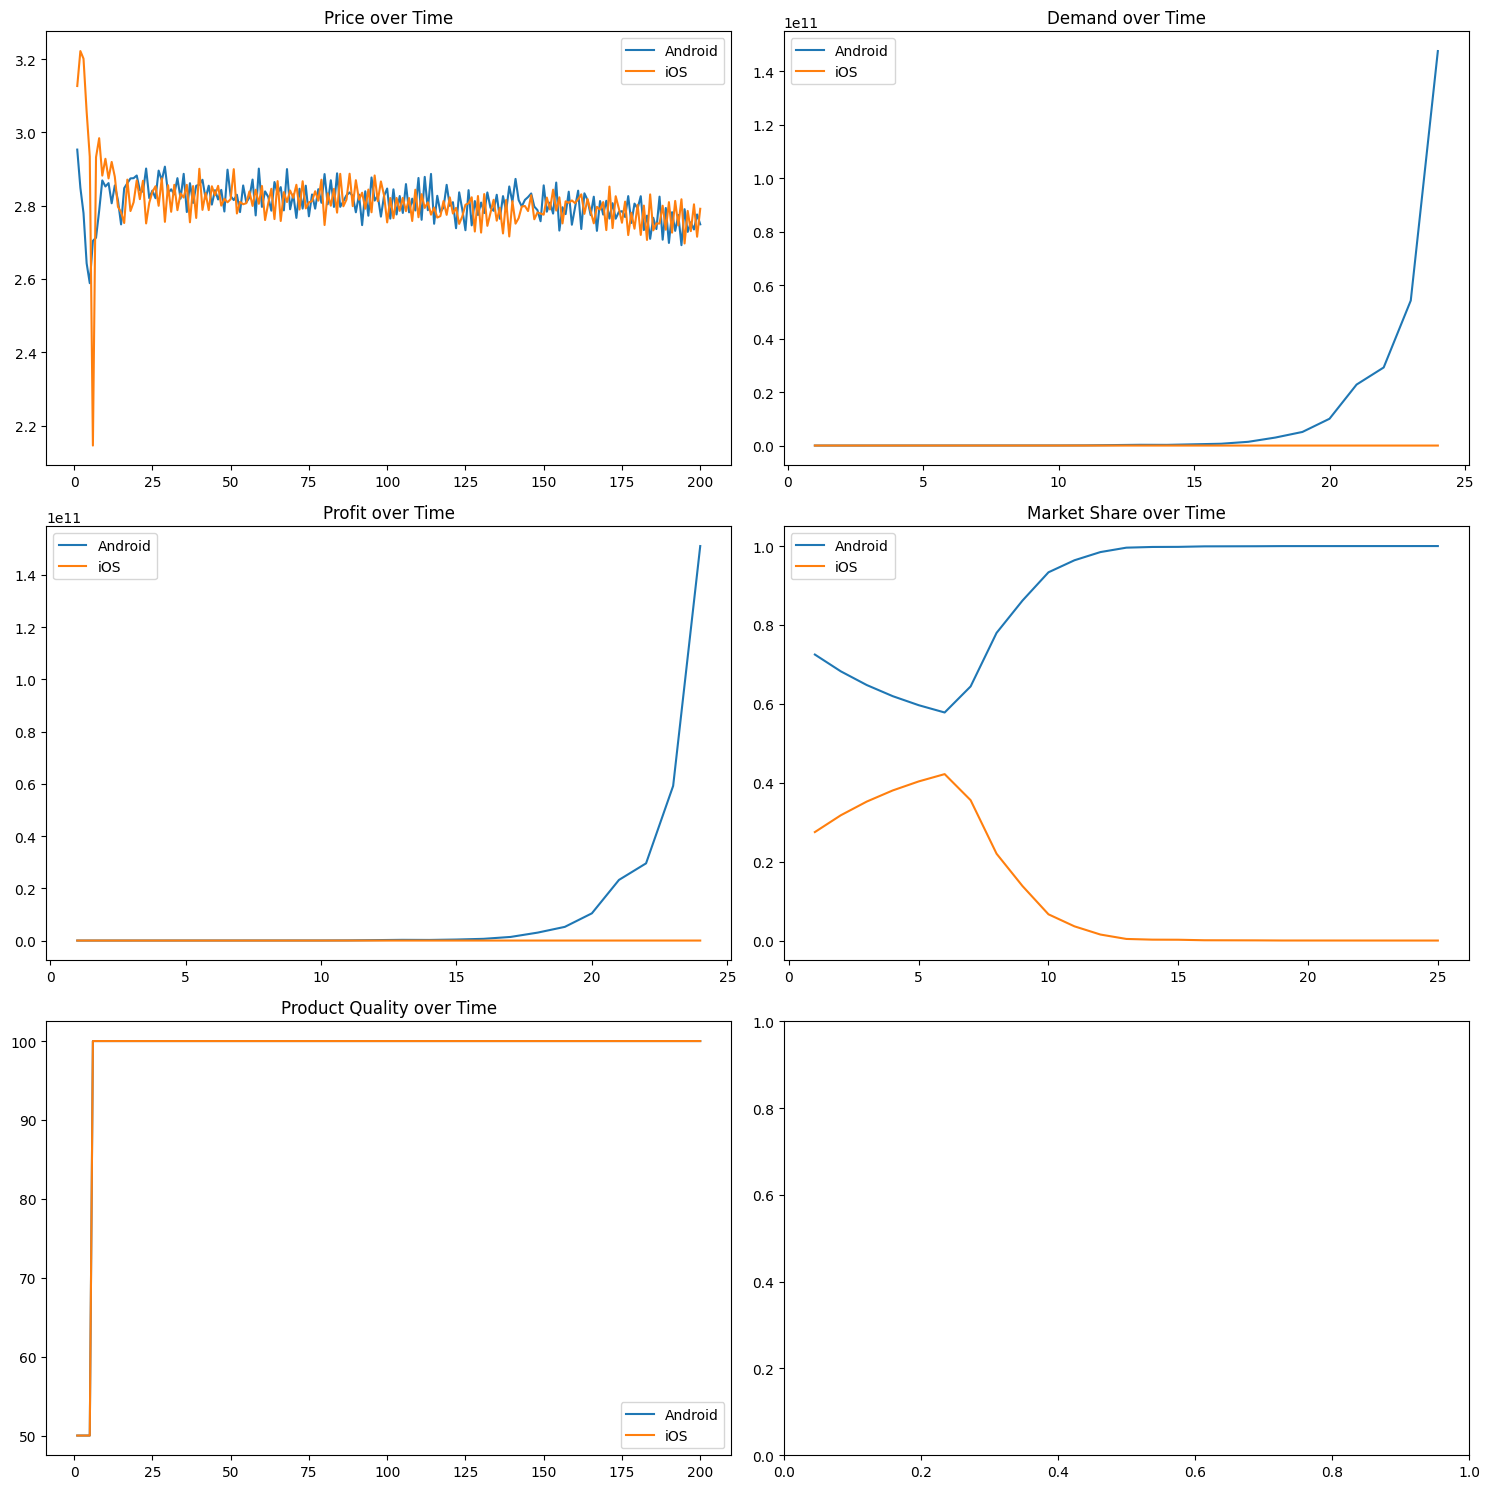


Final Statistics:
Android: Price = 2.75, Demand = nan, Profit = nan, Market Share = nan%, Quality = 100.00
iOS: Price = 2.79, Demand = nan, Profit = nan, Market Share = nan%, Quality = 100.00


In [ ]:
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import norm

class Firm:
    def __init__(self, name, initial_cost, initial_market_share, avg_income, loyalty_rate, innovation_rate):
        self.name = name
        self.cost = initial_cost
        self.price = initial_cost * 1.5
        self.market_share = initial_market_share
        self.avg_income = avg_income
        self.loyalty_rate = loyalty_rate
        self.innovation_rate = innovation_rate
        self.r_and_d_investment = 0
        self.marketing_investment = 0
        self.product_quality = 50  # Initial product quality (0-100)
        self.history = []

    def set_price(self, price):
        self.price = max(self.cost, price)

    def invest_in_r_and_d(self, amount):
        self.r_and_d_investment = amount
        self.product_quality = min(100, self.product_quality + amount * self.innovation_rate)

    def invest_in_marketing(self, amount):
        self.marketing_investment = amount

    def update_history(self, demand, profit):
        self.history.append((self.price, demand, profit, self.market_share, self.product_quality))

class Market:
    def __init__(self, total_users=1000000):
        self.android = Firm("Android", 2, 0.725, 61000, 0.89, 0.1)
        self.ios = Firm("iOS", 2, 0.275, 85000, 0.95, 0.12)  # Higher loyalty and innovation rate for iOS
        self.total_users = total_users
        self.round = 0

    def calculate_demand(self):
        price_diff = self.android.price - self.ios.price
        quality_diff = self.ios.product_quality - self.android.product_quality

        # Base market shares
        android_share = self.android.market_share
        ios_share = self.ios.market_share

        # Adjust shares based on price, quality, and loyalty
        share_shift = (price_diff * 0.0001 - quality_diff * 0.001) * (1 - self.ios.loyalty_rate)
        android_share -= share_shift
        ios_share += share_shift

        # Apply network effects
        android_network_effect = np.log(android_share * self.total_users) * 0.01
        ios_network_effect = np.log(ios_share * self.total_users) * 0.01
        android_share += android_network_effect
        ios_share += ios_network_effect

        # Normalize shares
        total_share = android_share + ios_share
        android_share /= total_share
        ios_share /= total_share

        # Calculate demands
        android_demand = android_share * self.total_users
        ios_demand = ios_share * self.total_users

        # Apply marketing effects
        android_demand *= (1 + self.android.marketing_investment * 0.0001)
        ios_demand *= (1 + self.ios.marketing_investment * 0.0001)

        return android_demand, ios_demand

    def calculate_profit(self, firm, demand):
        revenue = firm.price * demand
        costs = firm.cost * demand + firm.r_and_d_investment + firm.marketing_investment
        return revenue - costs

    def run_round(self):
        self.round += 1
        android_demand, ios_demand = self.calculate_demand()

        android_profit = self.calculate_profit(self.android, android_demand)
        ios_profit = self.calculate_profit(self.ios, ios_demand)

        self.android.update_history(android_demand, android_profit)
        self.ios.update_history(ios_demand, ios_profit)

        # Update market shares
        total_demand = android_demand + ios_demand
        self.android.market_share = android_demand / total_demand
        self.ios.market_share = ios_demand / total_demand

        # Simulate cost reduction due to technological advancements
        self.android.cost *= 0.995
        self.ios.cost *= 0.995

    def get_summary(self, firm, last_n=20):
        history = firm.history[-last_n:]
        avg_price = sum(h[0] for h in history) / len(history)
        avg_demand = sum(h[1] for h in history) / len(history)
        avg_profit = sum(h[2] for h in history) / len(history)
        avg_market_share = sum(h[3] for h in history) / len(history)
        avg_quality = sum(h[4] for h in history) / len(history)
        return f"Rounds #{self.round-last_n+1} - #{self.round}: [Avg Price: {avg_price:.2f}, Avg Demand: {avg_demand:.2f}, Avg Profit: {avg_profit:.2f}, Avg Market Share: {avg_market_share:.2%}, Avg Quality: {avg_quality:.2f}]"

def advanced_ai_strategy(market, firm, opponent):
    history = firm.history[-10:]  # Consider last 10 rounds

    if len(history) < 5:
        return max(firm.cost * 1.1, firm.price * random.uniform(0.95, 1.05))

    prices = [h[0] for h in history]
    profits = [h[2] for h in history]
    market_shares = [h[3] for h in history]

    avg_price = sum(prices) / len(prices)
    avg_profit = sum(profits) / len(profits)
    price_trend = sum(prices[i] - prices[i-1] for i in range(1, len(prices))) / (len(prices) - 1)
    profit_trend = sum(profits[i] - profits[i-1] for i in range(1, len(profits))) / (len(profits) - 1)
    market_share_trend = sum(market_shares[i] - market_shares[i-1] for i in range(1, len(market_shares))) / (len(market_shares) - 1)

    # Price adjustment based on trends
    if profit_trend > 0 and market_share_trend >= 0:
        price_adjustment = random.uniform(1.00, 1.03)
    elif profit_trend < 0 and market_share_trend < 0:
        price_adjustment = random.uniform(0.97, 1.00)
    else:
        price_adjustment = random.uniform(0.99, 1.01)

    # Competitor analysis
    if firm.price > opponent.price:
        price_adjustment *= random.uniform(0.98, 1.00)
    else:
        price_adjustment *= random.uniform(1.00, 1.02)

    # Quality-based pricing
    quality_factor = firm.product_quality / opponent.product_quality
    price_adjustment *= quality_factor

    new_price = avg_price * price_adjustment

    # R&D and Marketing investments
    if avg_profit > 0:
        r_and_d_investment = avg_profit * random.uniform(0.05, 0.15)
        marketing_investment = avg_profit * random.uniform(0.05, 0.15)
    else:
        r_and_d_investment = firm.cost * random.uniform(0.01, 0.05)
        marketing_investment = firm.cost * random.uniform(0.01, 0.05)

    firm.invest_in_r_and_d(r_and_d_investment)
    firm.invest_in_marketing(marketing_investment)

    return max(firm.cost * 1.1, new_price)

def run_simulation(num_rounds=200):
    market = Market()

    for _ in range(num_rounds):
        android_price = advanced_ai_strategy(market, market.android, market.ios)
        ios_price = advanced_ai_strategy(market, market.ios, market.android)

        market.android.set_price(android_price)
        market.ios.set_price(ios_price)
        market.run_round()

        if market.round % 20 == 0:
            print(f"Round {market.round}")
            print(f"{market.android.name}: {market.get_summary(market.android)}")
            print(f"{market.ios.name}: {market.get_summary(market.ios)}")
            print()

    return market

def plot_results(market):
    rounds = range(1, len(market.android.history) + 1)

    fig, axs = plt.subplots(3, 2, figsize=(15, 15))

    axs[0, 0].plot(rounds, [h[0] for h in market.android.history], label=market.android.name)
    axs[0, 0].plot(rounds, [h[0] for h in market.ios.history], label=market.ios.name)
    axs[0, 0].set_title('Price over Time')
    axs[0, 0].legend()

    axs[0, 1].plot(rounds, [h[1] for h in market.android.history], label=market.android.name)
    axs[0, 1].plot(rounds, [h[1] for h in market.ios.history], label=market.ios.name)
    axs[0, 1].set_title('Demand over Time')
    axs[0, 1].legend()

    axs[1, 0].plot(rounds, [h[2] for h in market.android.history], label=market.android.name)
    axs[1, 0].plot(rounds, [h[2] for h in market.ios.history], label=market.ios.name)
    axs[1, 0].set_title('Profit over Time')
    axs[1, 0].legend()

    axs[1, 1].plot(rounds, [h[3] for h in market.android.history], label=market.android.name)
    axs[1, 1].plot(rounds, [h[3] for h in market.ios.history], label=market.ios.name)
    axs[1, 1].set_title('Market Share over Time')
    axs[1, 1].legend()

    axs[2, 0].plot(rounds, [h[4] for h in market.android.history], label=market.android.name)
    axs[2, 0].plot(rounds, [h[4] for h in market.ios.history], label=market.ios.name)
    axs[2, 0].set_title('Product Quality over Time')
    axs[2, 0].legend()

    plt.tight_layout()
    plt.show()

# Run the simulation
final_market = run_simulation(200)

# Plot the results
plot_results(final_market)

# Display final statistics
print("\nFinal Statistics:")
print(f"Android: Price = {final_market.android.price:.2f}, Demand = {final_market.android.history[-1][1]:.2f}, Profit = {final_market.android.history[-1][2]:.2f}, Market Share = {final_market.android.market_share:.2%}, Quality = {final_market.android.product_quality:.2f}")
print(f"iOS: Price = {final_market.ios.price:.2f}, Demand = {final_market.ios.history[-1][1]:.2f}, Profit = {final_market.ios.history[-1][2]:.2f}, Market Share = {final_market.ios.market_share:.2%}, Quality = {final_market.ios.product_quality:.2f}")

Round 20
Android: Rounds #1 - #20: [Avg Price: 2.90, Avg Demand: 1324992018.40, Avg Profit: 1404459400.60, Avg Market Share: 92.30%, Avg Quality: 87.50]
iOS: Rounds #1 - #20: [Avg Price: 2.70, Avg Demand: 96895.73, Avg Profit: 59791.98, Avg Market Share: 7.70%, Avg Quality: 87.50]

Round 40
Android: Rounds #21 - #40: [Avg Price: 2.92, Avg Demand: 150905100832422.06, Avg Profit: 190500475742082.75, Avg Market Share: 100.00%, Avg Quality: 100.00]
iOS: Rounds #21 - #40: [Avg Price: 2.72, Avg Demand: 10628.34, Avg Profit: 9275.49, Avg Market Share: 0.00%, Avg Quality: 100.00]

Round 60
Android: Rounds #41 - #60: [Avg Price: 2.98, Avg Demand: 282043972609273692160.00, Avg Profit: 421665743920298590208.00, Avg Market Share: 100.00%, Avg Quality: 100.00]
iOS: Rounds #41 - #60: [Avg Price: 2.80, Avg Demand: 10846.83, Avg Profit: 11665.37, Avg Market Share: 0.00%, Avg Quality: 100.00]

Round 80
Android: Rounds #61 - #80: [Avg Price: 3.02, Avg Demand: 3107941190759547912838971392.00, Avg Profit:

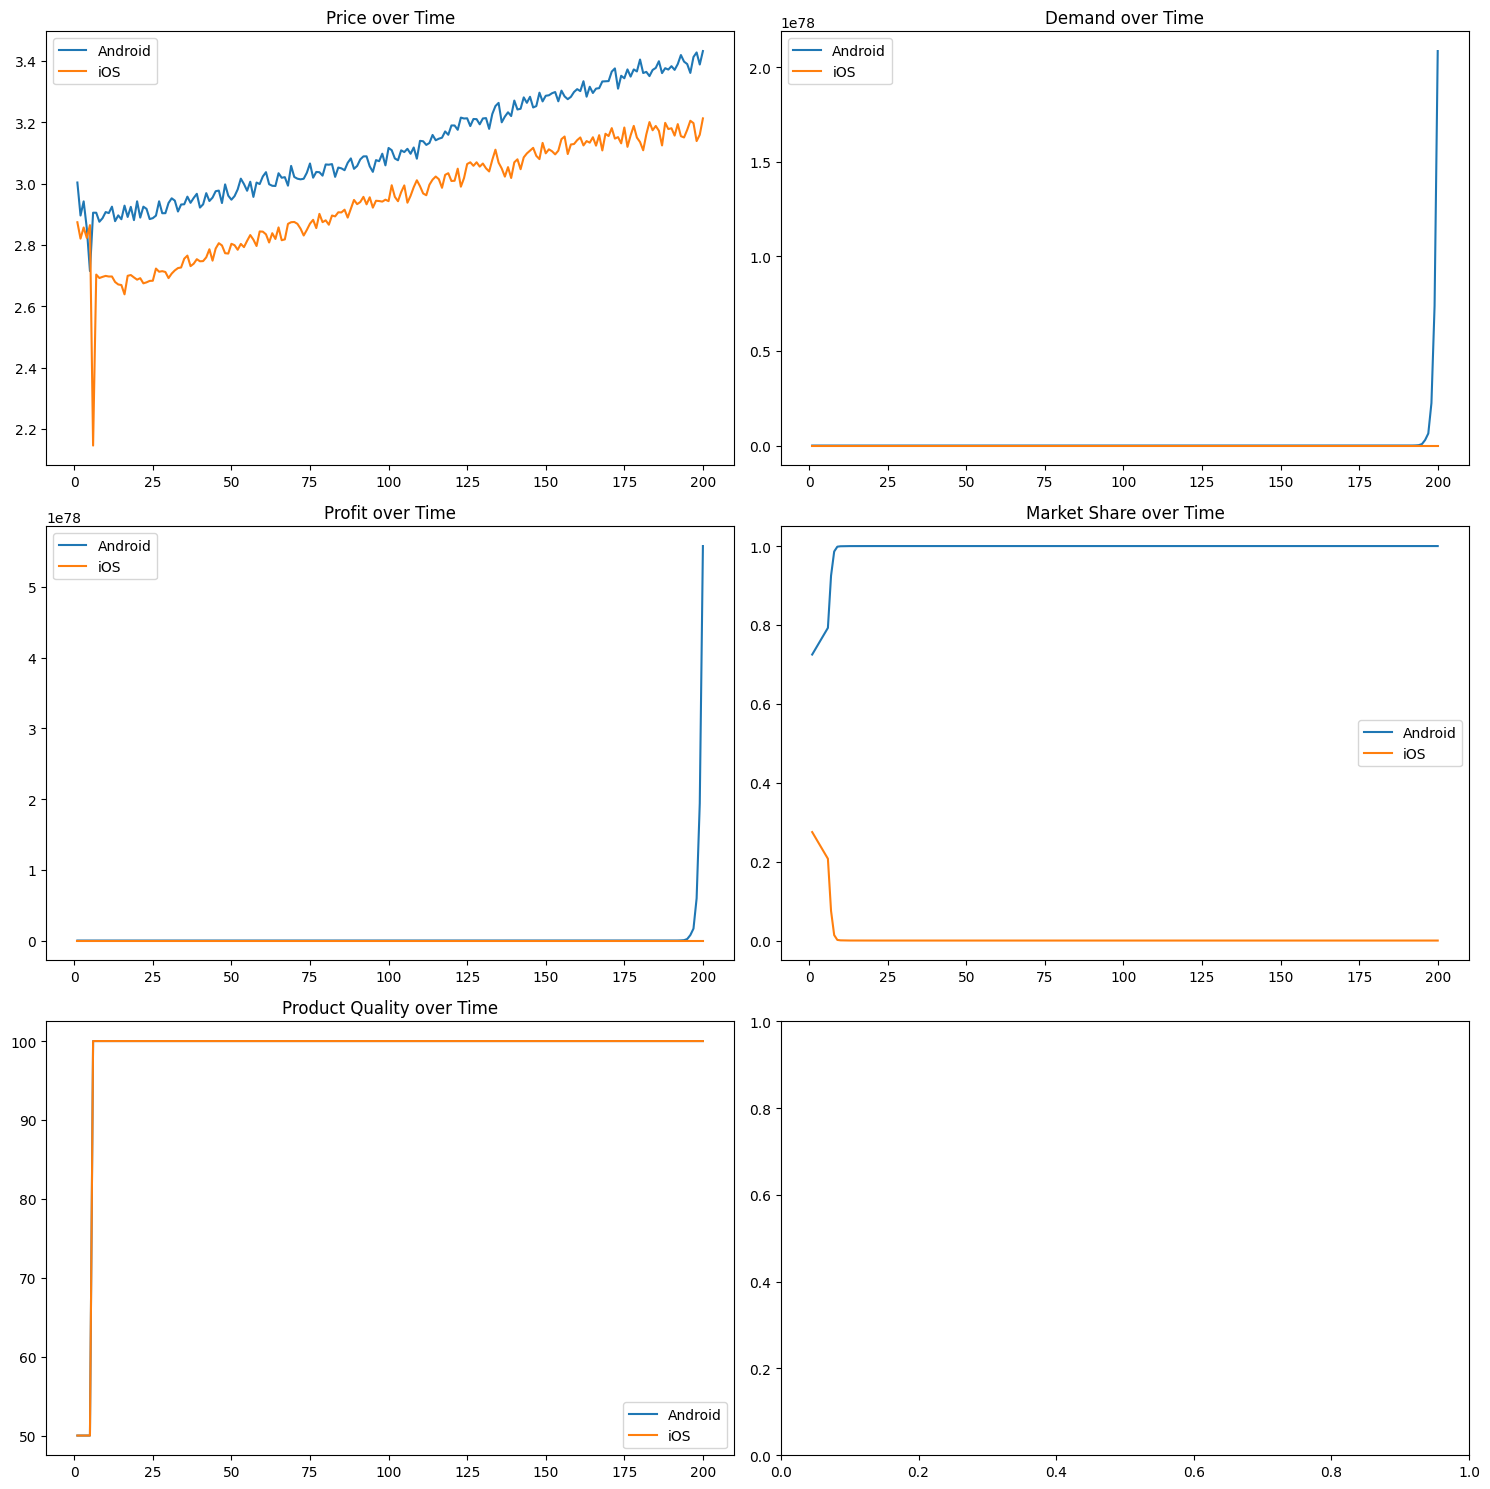


Final Statistics:
Android: Price = 3.43, Demand = 2084891197824003252032544427951292432633368407798620604716787247440172014370816.00, Profit = 5577099063430015209909039715136136243881951930595809103060960044964667277180928.00, Market Share = 100.00%, Quality = 100.00
iOS: Price = 3.21, Demand = 11532.84, Profit = 25512.64, Market Share = 0.00%, Quality = 100.00


In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np

class Firm:
    def __init__(self, name, initial_cost, initial_market_share, avg_income, loyalty_rate, innovation_rate):
        self.name = name
        self.cost = initial_cost
        self.price = initial_cost * 1.5
        self.market_share = initial_market_share
        self.avg_income = avg_income
        self.loyalty_rate = loyalty_rate
        self.innovation_rate = innovation_rate
        self.r_and_d_investment = 0
        self.marketing_investment = 0
        self.product_quality = 50  # Initial product quality (0-100)
        self.history = []

    def set_price(self, price):
        self.price = max(self.cost, price)

    def invest_in_r_and_d(self, amount):
        self.r_and_d_investment = amount
        quality_increase = amount * self.innovation_rate * 0.1
        self.product_quality = min(100, self.product_quality + quality_increase)

    def invest_in_marketing(self, amount):
        self.marketing_investment = amount

    def update_history(self, demand, profit):
        self.history.append((self.price, demand, profit, self.market_share, self.product_quality))

class Market:
    def __init__(self, total_users=1000000):
        self.android = Firm("Android", 2, 0.725, 61000, 0.89, 0.1)
        self.ios = Firm("iOS", 2, 0.275, 85000, 0.95, 0.12)  # Higher loyalty and innovation rate for iOS
        self.total_users = total_users
        self.round = 0

    def calculate_demand(self):
        price_diff = self.android.price - self.ios.price
        quality_diff = self.ios.product_quality - self.android.product_quality

        # Base market shares
        android_share = self.android.market_share
        ios_share = self.ios.market_share

        # Adjust shares based on price, quality, and loyalty
        share_shift = (price_diff * 0.0001 - quality_diff * 0.001) * (1 - self.ios.loyalty_rate)
        android_share = max(0.01, min(0.99, android_share - share_shift))
        ios_share = 1 - android_share

        # Apply network effects (using a safer log function)
        def safe_log(x):
            return np.log(max(x, 1e-10))

        android_network_effect = safe_log(android_share * self.total_users) * 0.001
        ios_network_effect = safe_log(ios_share * self.total_users) * 0.001

        android_share = max(0.01, min(0.99, android_share + android_network_effect))
        ios_share = 1 - android_share

        # Calculate demands
        android_demand = android_share * self.total_users
        ios_demand = ios_share * self.total_users

        # Apply marketing effects
        android_demand *= (1 + self.android.marketing_investment * 0.0001)
        ios_demand *= (1 + self.ios.marketing_investment * 0.0001)

        return android_demand, ios_demand

    def calculate_profit(self, firm, demand):
        revenue = firm.price * demand
        costs = firm.cost * demand + firm.r_and_d_investment + firm.marketing_investment
        return revenue - costs

    def run_round(self):
        self.round += 1
        android_demand, ios_demand = self.calculate_demand()

        android_profit = self.calculate_profit(self.android, android_demand)
        ios_profit = self.calculate_profit(self.ios, ios_demand)

        self.android.update_history(android_demand, android_profit)
        self.ios.update_history(ios_demand, ios_profit)

        # Update market shares
        total_demand = android_demand + ios_demand
        self.android.market_share = android_demand / total_demand
        self.ios.market_share = ios_demand / total_demand

        # Simulate cost reduction due to technological advancements
        self.android.cost *= 0.995
        self.ios.cost *= 0.995

    def get_summary(self, firm, last_n=20):
        history = firm.history[-last_n:]
        avg_price = sum(h[0] for h in history) / len(history)
        avg_demand = sum(h[1] for h in history) / len(history)
        avg_profit = sum(h[2] for h in history) / len(history)
        avg_market_share = sum(h[3] for h in history) / len(history)
        avg_quality = sum(h[4] for h in history) / len(history)
        return f"Rounds #{self.round-last_n+1} - #{self.round}: [Avg Price: {avg_price:.2f}, Avg Demand: {avg_demand:.2f}, Avg Profit: {avg_profit:.2f}, Avg Market Share: {avg_market_share:.2%}, Avg Quality: {avg_quality:.2f}]"

def advanced_ai_strategy(market, firm, opponent):
    history = firm.history[-10:]  # Consider last 10 rounds

    if len(history) < 5:
        return max(firm.cost * 1.1, firm.price * random.uniform(0.95, 1.05))

    prices = [h[0] for h in history]
    profits = [h[2] for h in history]
    market_shares = [h[3] for h in history]

    avg_price = sum(prices) / len(prices)
    avg_profit = sum(profits) / len(profits)
    price_trend = sum(prices[i] - prices[i-1] for i in range(1, len(prices))) / (len(prices) - 1)
    profit_trend = sum(profits[i] - profits[i-1] for i in range(1, len(profits))) / (len(profits) - 1)
    market_share_trend = sum(market_shares[i] - market_shares[i-1] for i in range(1, len(market_shares))) / (len(market_shares) - 1)

    # Price adjustment based on trends
    if profit_trend > 0 and market_share_trend >= 0:
        price_adjustment = random.uniform(1.00, 1.02)
    elif profit_trend < 0 and market_share_trend < 0:
        price_adjustment = random.uniform(0.98, 1.00)
    else:
        price_adjustment = random.uniform(0.99, 1.01)

    # Competitor analysis
    if firm.price > opponent.price:
        price_adjustment *= random.uniform(0.99, 1.00)
    else:
        price_adjustment *= random.uniform(1.00, 1.01)

    # Quality-based pricing
    quality_factor = (firm.product_quality / opponent.product_quality) ** 0.5
    price_adjustment *= quality_factor

    new_price = avg_price * price_adjustment

    # R&D and Marketing investments
    if avg_profit > 0:
        r_and_d_investment = avg_profit * random.uniform(0.05, 0.10)
        marketing_investment = avg_profit * random.uniform(0.05, 0.10)
    else:
        r_and_d_investment = firm.cost * random.uniform(0.01, 0.03)
        marketing_investment = firm.cost * random.uniform(0.01, 0.03)

    firm.invest_in_r_and_d(r_and_d_investment)
    firm.invest_in_marketing(marketing_investment)

    return max(firm.cost * 1.1, new_price)

def run_simulation(num_rounds=200):
    market = Market()

    for _ in range(num_rounds):
        android_price = advanced_ai_strategy(market, market.android, market.ios)
        ios_price = advanced_ai_strategy(market, market.ios, market.android)

        market.android.set_price(android_price)
        market.ios.set_price(ios_price)
        market.run_round()

        if market.round % 20 == 0:
            print(f"Round {market.round}")
            print(f"{market.android.name}: {market.get_summary(market.android)}")
            print(f"{market.ios.name}: {market.get_summary(market.ios)}")
            print()

    return market

def plot_results(market):
    rounds = range(1, len(market.android.history) + 1)

    fig, axs = plt.subplots(3, 2, figsize=(15, 15))

    axs[0, 0].plot(rounds, [h[0] for h in market.android.history], label=market.android.name)
    axs[0, 0].plot(rounds, [h[0] for h in market.ios.history], label=market.ios.name)
    axs[0, 0].set_title('Price over Time')
    axs[0, 0].legend()

    axs[0, 1].plot(rounds, [h[1] for h in market.android.history], label=market.android.name)
    axs[0, 1].plot(rounds, [h[1] for h in market.ios.history], label=market.ios.name)
    axs[0, 1].set_title('Demand over Time')
    axs[0, 1].legend()

    axs[1, 0].plot(rounds, [h[2] for h in market.android.history], label=market.android.name)
    axs[1, 0].plot(rounds, [h[2] for h in market.ios.history], label=market.ios.name)
    axs[1, 0].set_title('Profit over Time')
    axs[1, 0].legend()

    axs[1, 1].plot(rounds, [h[3] for h in market.android.history], label=market.android.name)
    axs[1, 1].plot(rounds, [h[3] for h in market.ios.history], label=market.ios.name)
    axs[1, 1].set_title('Market Share over Time')
    axs[1, 1].legend()

    axs[2, 0].plot(rounds, [h[4] for h in market.android.history], label=market.android.name)
    axs[2, 0].plot(rounds, [h[4] for h in market.ios.history], label=market.ios.name)
    axs[2, 0].set_title('Product Quality over Time')
    axs[2, 0].legend()

    plt.tight_layout()
    plt.show()

# Run the simulation
final_market = run_simulation(200)

# Plot the results
plot_results(final_market)

# Display final statistics
print("\nFinal Statistics:")
print(f"Android: Price = {final_market.android.price:.2f}, Demand = {final_market.android.history[-1][1]:.2f}, Profit = {final_market.android.history[-1][2]:.2f}, Market Share = {final_market.android.market_share:.2%}, Quality = {final_market.android.product_quality:.2f}")
print(f"iOS: Price = {final_market.ios.price:.2f}, Demand = {final_market.ios.history[-1][1]:.2f}, Profit = {final_market.ios.history[-1][2]:.2f}, Market Share = {final_market.ios.market_share:.2%}, Quality = {final_market.ios.product_quality:.2f}")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple
import random

# Load data
market_share = pd.read_csv('/content/market_share.csv')
key_statistics = pd.read_csv('/content/key-statistics.csv', index_col='Metric')
app_store_revenue = pd.read_csv('/content/app-store-revenue.csv')

class User:
    def __init__(self, os: str, income: float, loyalty: float):
        self.os = os
        self.income = income
        self.loyalty = loyalty
        self.satisfaction = random.uniform(0.5, 1.0)

    def switch_os(self) -> bool:
        if random.random() > self.loyalty:
            self.os = 'iOS' if self.os == 'Android' else 'Android'
            return True
        return False

    def update_satisfaction(self, ecosystem_quality: float):
        self.satisfaction = min(1.0, self.satisfaction * 0.9 + ecosystem_quality * 0.1)

class Ecosystem:
    def __init__(self, name: str, initial_market_share: float, avg_income: float, loyalty_rate: float):
        self.name = name
        self.market_share = initial_market_share
        self.avg_income = avg_income
        self.loyalty_rate = loyalty_rate
        self.users: List[User] = []
        self.revenue = 0
        self.ecosystem_quality = random.uniform(0.6, 0.8)

    def add_user(self, user: User):
        self.users.append(user)

    def remove_user(self, user: User):
        self.users.remove(user)

    def update_market_share(self, total_users: int):
        self.market_share = len(self.users) / total_users

    def update_ecosystem_quality(self):
        self.ecosystem_quality = min(1.0, self.ecosystem_quality * 0.95 + random.uniform(0, 0.1))

    def calculate_revenue(self):
        self.revenue = sum([user.income * 0.01 * user.satisfaction for user in self.users])

class Simulation:
    def __init__(self, num_users: int, num_years: int):
        self.num_users = num_users
        self.num_years = num_years
        self.android = Ecosystem('Android', 0.7, 61000, 0.89)
        self.ios = Ecosystem('iOS', 0.3, 85000, 0.87)
        self.initialize_users()

    def initialize_users(self):
        for _ in range(int(self.num_users * 0.7)):
            self.android.add_user(User('Android', random.gauss(61000, 10000), random.gauss(0.89, 0.05)))
        for _ in range(int(self.num_users * 0.3)):
            self.ios.add_user(User('iOS', random.gauss(85000, 15000), random.gauss(0.87, 0.05)))

    def run(self) -> Tuple[List[float], List[float], List[float], List[float]]:
        android_shares, ios_shares = [], []
        android_revenues, ios_revenues = [], []

        for _ in range(self.num_years * 12):  # Monthly iterations
            self.android.update_ecosystem_quality()
            self.ios.update_ecosystem_quality()

            for user in self.android.users + self.ios.users:
                if user.os == 'Android':
                    user.update_satisfaction(self.android.ecosystem_quality)
                    if user.switch_os():
                        self.android.remove_user(user)
                        self.ios.add_user(user)
                else:
                    user.update_satisfaction(self.ios.ecosystem_quality)
                    if user.switch_os():
                        self.ios.remove_user(user)
                        self.android.add_user(user)

            self.android.update_market_share(self.num_users)
            self.ios.update_market_share(self.num_users)
            self.android.calculate_revenue()
            self.ios.calculate_revenue()

            android_shares.append(self.android.market_share)
            ios_shares.append(self.ios.market_share)
            android_revenues.append(self.android.revenue)
            ios_revenues.append(self.ios.revenue)

        return android_shares, ios_shares, android_revenues, ios_revenues

# Run simulation
sim = Simulation(1000000, 10)
android_shares, ios_shares, android_revenues, ios_revenues = sim.run()

# Visualize results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(android_shares, label='Android')
plt.plot(ios_shares, label='iOS')
plt.title('Market Share Over Time')
plt.xlabel('Months')
plt.ylabel('Market Share')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(android_revenues, label='Android')
plt.plot(ios_revenues, label='iOS')
plt.title('Revenue Over Time')
plt.xlabel('Months')
plt.ylabel('Revenue')
plt.legend()

plt.tight_layout()
plt.show()

# Print final results
print(f"Final Android Market Share: {android_shares[-1]:.2%}")
print(f"Final iOS Market Share: {ios_shares[-1]:.2%}")
print(f"Final Android Revenue: ${android_revenues[-1]:,.2f}")
print(f"Final iOS Revenue: ${ios_revenues[-1]:,.2f}")

KeyboardInterrupt: 

In [ ]:
!pip install tqdm

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Dict, Any
import random
from tqdm import tqdm

# Load data (assuming CSV files are uploaded to Colab)
market_share = pd.read_csv('/content/market_share.csv')
key_statistics = pd.read_csv('/content/key-statistics.csv', index_col='Metric')
app_store_revenue = pd.read_csv('/content/app-store-revenue.csv')

class AIAgent:
    def __init__(self, os: str, income: float, tech_savviness: float, brand_loyalty: float):
        self.os = os
        self.income = income
        self.tech_savviness = tech_savviness
        self.brand_loyalty = brand_loyalty
        self.satisfaction = random.uniform(0.5, 1.0)
        self.apps_purchased = 0
        self.money_spent = 0

    def decide_purchase(self, app_quality: float, app_price: float) -> bool:
        purchase_probability = (
            self.satisfaction * 0.3 +
            self.tech_savviness * 0.2 +
            (1 - app_price / self.income) * 0.3 +
            app_quality * 0.2
        )
        return random.random() < purchase_probability

    def update_satisfaction(self, ecosystem_quality: float, competitor_quality: float):
        relative_quality = ecosystem_quality / (ecosystem_quality + competitor_quality)
        self.satisfaction = (
            self.satisfaction * 0.7 +
            relative_quality * 0.2 +
            random.uniform(-0.05, 0.05) * 0.1
        )
        self.satisfaction = max(0, min(1, self.satisfaction))

    def consider_switching(self, competitor_quality: float) -> bool:
        switch_probability = (
            (1 - self.brand_loyalty) * 0.4 +
            (1 - self.satisfaction) * 0.4 +
            competitor_quality * 0.2
        )
        return random.random() < switch_probability

class Ecosystem:
    def __init__(self, name: str, initial_market_share: float, avg_income: float, avg_loyalty: float):
        self.name = name
        self.market_share = initial_market_share
        self.avg_income = avg_income
        self.avg_loyalty = avg_loyalty
        self.users: List[AIAgent] = []
        self.revenue = 0
        self.app_revenue = 0
        self.ecosystem_quality = random.uniform(0.6, 0.8)
        self.app_catalog_size = 1000000  # Starting with 1 million apps
        self.innovation_rate = random.uniform(0.01, 0.03)

    def add_user(self, user: AIAgent):
        self.users.append(user)

    def remove_user(self, user: AIAgent):
        self.users.remove(user)

    def update_market_share(self, total_users: int):
        self.market_share = len(self.users) / total_users

    def update_ecosystem(self):
        self.ecosystem_quality = min(1.0, self.ecosystem_quality * 0.95 + self.innovation_rate)
        self.app_catalog_size *= (1 + random.uniform(0, 0.01))  # 0-1% growth in app catalog

    def calculate_revenue(self):
        device_revenue = sum([user.income * 0.05 for user in self.users])  # Assume 5% of income spent on devices
        self.app_revenue = sum([user.money_spent for user in self.users])
        self.revenue = device_revenue + self.app_revenue

class World:
    def __init__(self, num_agents: int):
        self.num_agents = num_agents
        self.android = Ecosystem('Android', 0.7, 61000, 0.89)
        self.ios = Ecosystem('iOS', 0.3, 85000, 0.87)
        self.initialize_agents()
        self.month = 0

    def initialize_agents(self):
        for _ in range(self.num_agents):
            if random.random() < 0.7:  # 70% Android users initially
                self.android.add_user(AIAgent('Android', random.gauss(61000, 10000), random.random(), random.gauss(0.89, 0.05)))
            else:
                self.ios.add_user(AIAgent('iOS', random.gauss(85000, 15000), random.random(), random.gauss(0.87, 0.05)))

    def simulate_month(self):
        self.month += 1
        self.android.update_ecosystem()
        self.ios.update_ecosystem()

        for user in self.android.users + self.ios.users:
            current_ecosystem = self.android if user.os == 'Android' else self.ios
            competitor_ecosystem = self.ios if user.os == 'Android' else self.android

            # Update user satisfaction
            user.update_satisfaction(current_ecosystem.ecosystem_quality, competitor_ecosystem.ecosystem_quality)

            # Simulate app purchases
            for _ in range(random.randint(0, 5)):  # 0-5 potential app purchases per month
                app_quality = random.uniform(0.3, 1.0)
                app_price = random.uniform(0.99, 9.99)
                if user.decide_purchase(app_quality, app_price):
                    user.apps_purchased += 1
                    user.money_spent += app_price

            # Consider switching ecosystems
            if user.consider_switching(competitor_ecosystem.ecosystem_quality):
                current_ecosystem.remove_user(user)
                competitor_ecosystem.add_user(user)
                user.os = competitor_ecosystem.name

        self.android.update_market_share(self.num_agents)
        self.ios.update_market_share(self.num_agents)
        self.android.calculate_revenue()
        self.ios.calculate_revenue()

    def run_simulation(self, num_months: int) -> Dict[str, List[float]]:
        results = {
            'android_share': [], 'ios_share': [],
            'android_revenue': [], 'ios_revenue': [],
            'android_app_revenue': [], 'ios_app_revenue': [],
            'android_quality': [], 'ios_quality': []
        }

        for _ in tqdm(range(num_months)):
            self.simulate_month()
            results['android_share'].append(self.android.market_share)
            results['ios_share'].append(self.ios.market_share)
            results['android_revenue'].append(self.android.revenue)
            results['ios_revenue'].append(self.ios.revenue)
            results['android_app_revenue'].append(self.android.app_revenue)
            results['ios_app_revenue'].append(self.ios.app_revenue)
            results['android_quality'].append(self.android.ecosystem_quality)
            results['ios_quality'].append(self.ios.ecosystem_quality)

        return results

def run_scenario(scenario: Dict[str, Any]) -> Dict[str, List[float]]:
    world = World(scenario['num_agents'])
    world.android.innovation_rate = scenario['android_innovation']
    world.ios.innovation_rate = scenario['ios_innovation']
    return world.run_simulation(scenario['num_months'])

def plot_results(results: Dict[str, List[float]], title: str):
    fig, axs = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle(title)

    axs[0, 0].plot(results['android_share'], label='Android')
    axs[0, 0].plot(results['ios_share'], label='iOS')
    axs[0, 0].set_title('Market Share')
    axs[0, 0].set_ylabel('Share')
    axs[0, 0].legend()

    axs[0, 1].plot(results['android_revenue'], label='Android')
    axs[0, 1].plot(results['ios_revenue'], label='iOS')
    axs[0, 1].set_title('Total Revenue')
    axs[0, 1].set_ylabel('Revenue')
    axs[0, 1].legend()

    axs[1, 0].plot(results['android_app_revenue'], label='Android')
    axs[1, 0].plot(results['ios_app_revenue'], label='iOS')
    axs[1, 0].set_title('App Revenue')
    axs[1, 0].set_ylabel('Revenue')
    axs[1, 0].legend()

    axs[1, 1].plot(results['android_quality'], label='Android')
    axs[1, 1].plot(results['ios_quality'], label='iOS')
    axs[1, 1].set_title('Ecosystem Quality')
    axs[1, 1].set_ylabel('Quality')
    axs[1, 1].legend()

    for ax in axs.flat:
        ax.set_xlabel('Months')

    plt.tight_layout()
    plt.show()

# Define scenarios
scenarios = [
    {
        'name': 'Baseline',
        'num_agents': 1000000,
        'num_months': 60,
        'android_innovation': 0.02,
        'ios_innovation': 0.02
    },
    {
        'name': 'Android Innovates',
        'num_agents': 1000000,
        'num_months': 60,
        'android_innovation': 0.03,
        'ios_innovation': 0.01
    },
    {
        'name': 'iOS Innovates',
        'num_agents': 1000000,
        'num_months': 60,
        'android_innovation': 0.01,
        'ios_innovation': 0.03
    }
]

# Run scenarios and plot results
for scenario in scenarios:
    results = run_scenario(scenario)
    plot_results(results, scenario['name'])

    print(f"\nFinal results for {scenario['name']}:")
    print(f"Android Market Share: {results['android_share'][-1]:.2%}")
    print(f"iOS Market Share: {results['ios_share'][-1]:.2%}")
    print(f"Android Total Revenue: ${results['android_revenue'][-1]:,.2f}")
    print(f"iOS Total Revenue: ${results['ios_revenue'][-1]:,.2f}")
    print(f"Android App Revenue: ${results['android_app_revenue'][-1]:,.2f}")
    print(f"iOS App Revenue: ${results['ios_app_revenue'][-1]:,.2f}")
    print(f"Android Ecosystem Quality: {results['android_quality'][-1]:.2f}")
    print(f"iOS Ecosystem Quality: {results['ios_quality'][-1]:.2f}")

  0%|          | 0/60 [01:50<?, ?it/s]


KeyboardInterrupt: 

Using device: cuda


100%|██████████| 60/60 [00:00<00:00, 94.46it/s] 


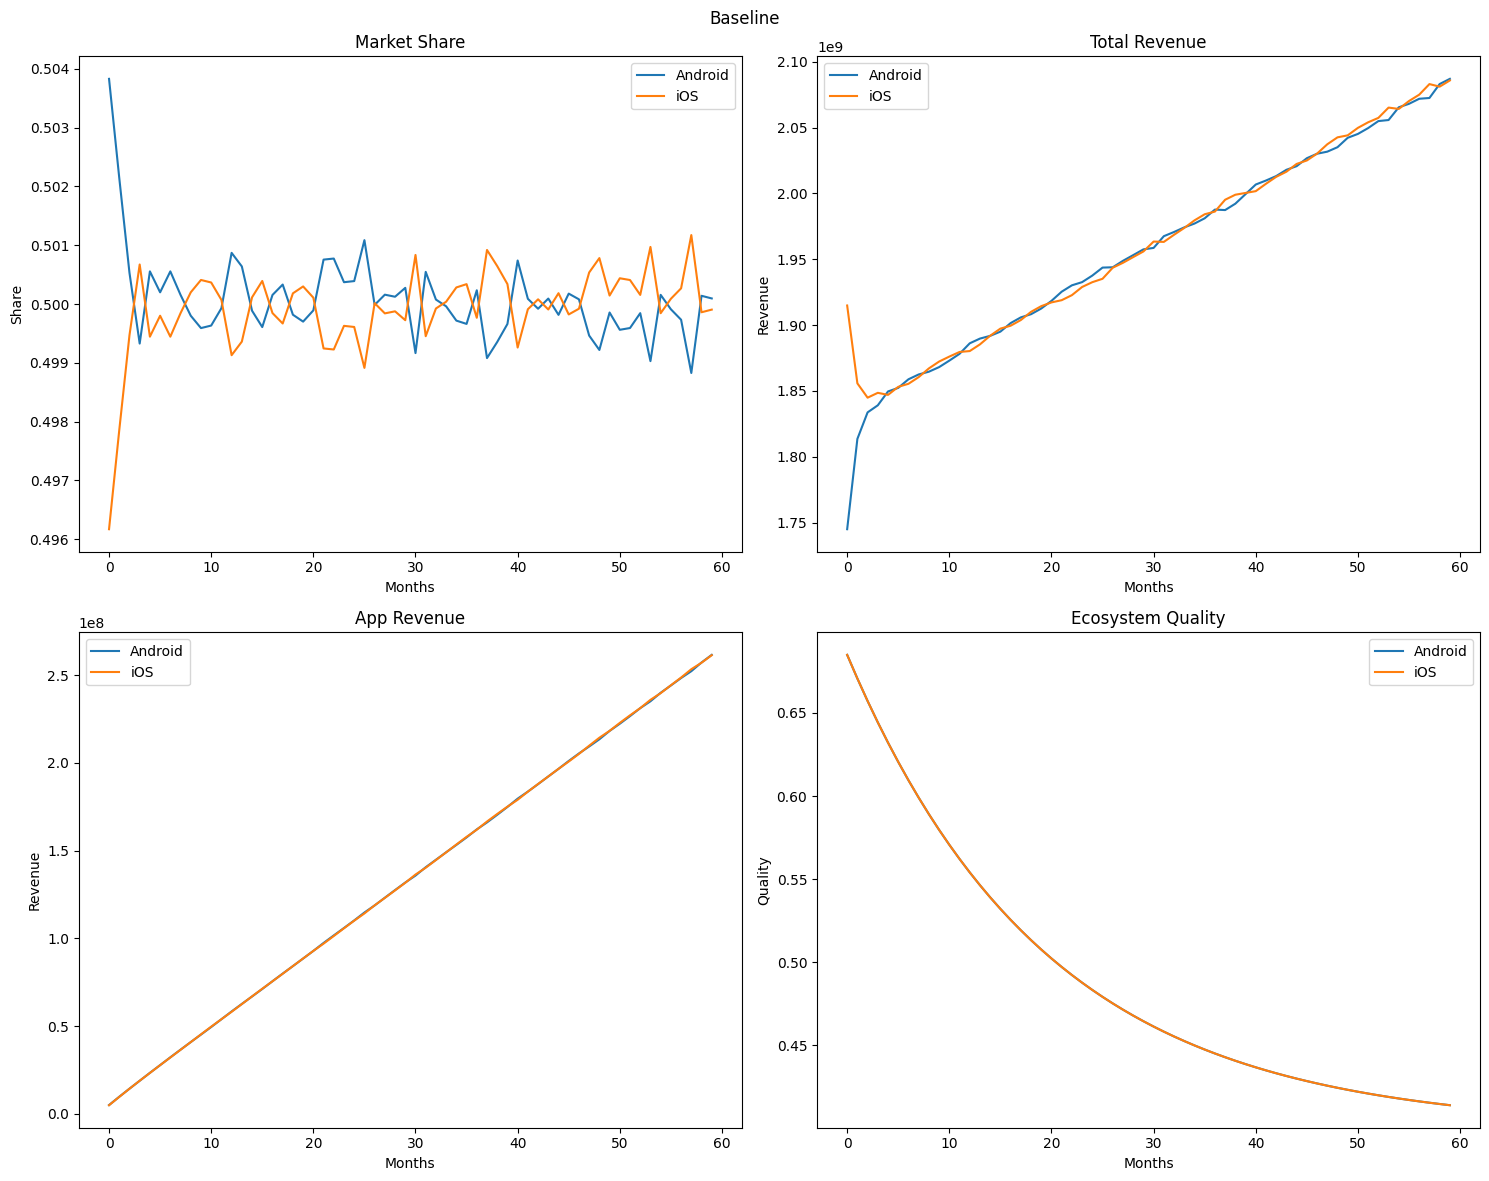


Final results for Baseline:
Android Market Share: 50.01%
iOS Market Share: 49.99%
Android Total Revenue: $2,087,029,632.00
iOS Total Revenue: $2,085,821,440.00
Android App Revenue: $261,540,752.00
iOS App Revenue: $261,341,152.00
Android Ecosystem Quality: 0.41
iOS Ecosystem Quality: 0.41


100%|██████████| 60/60 [00:00<00:00, 213.20it/s]


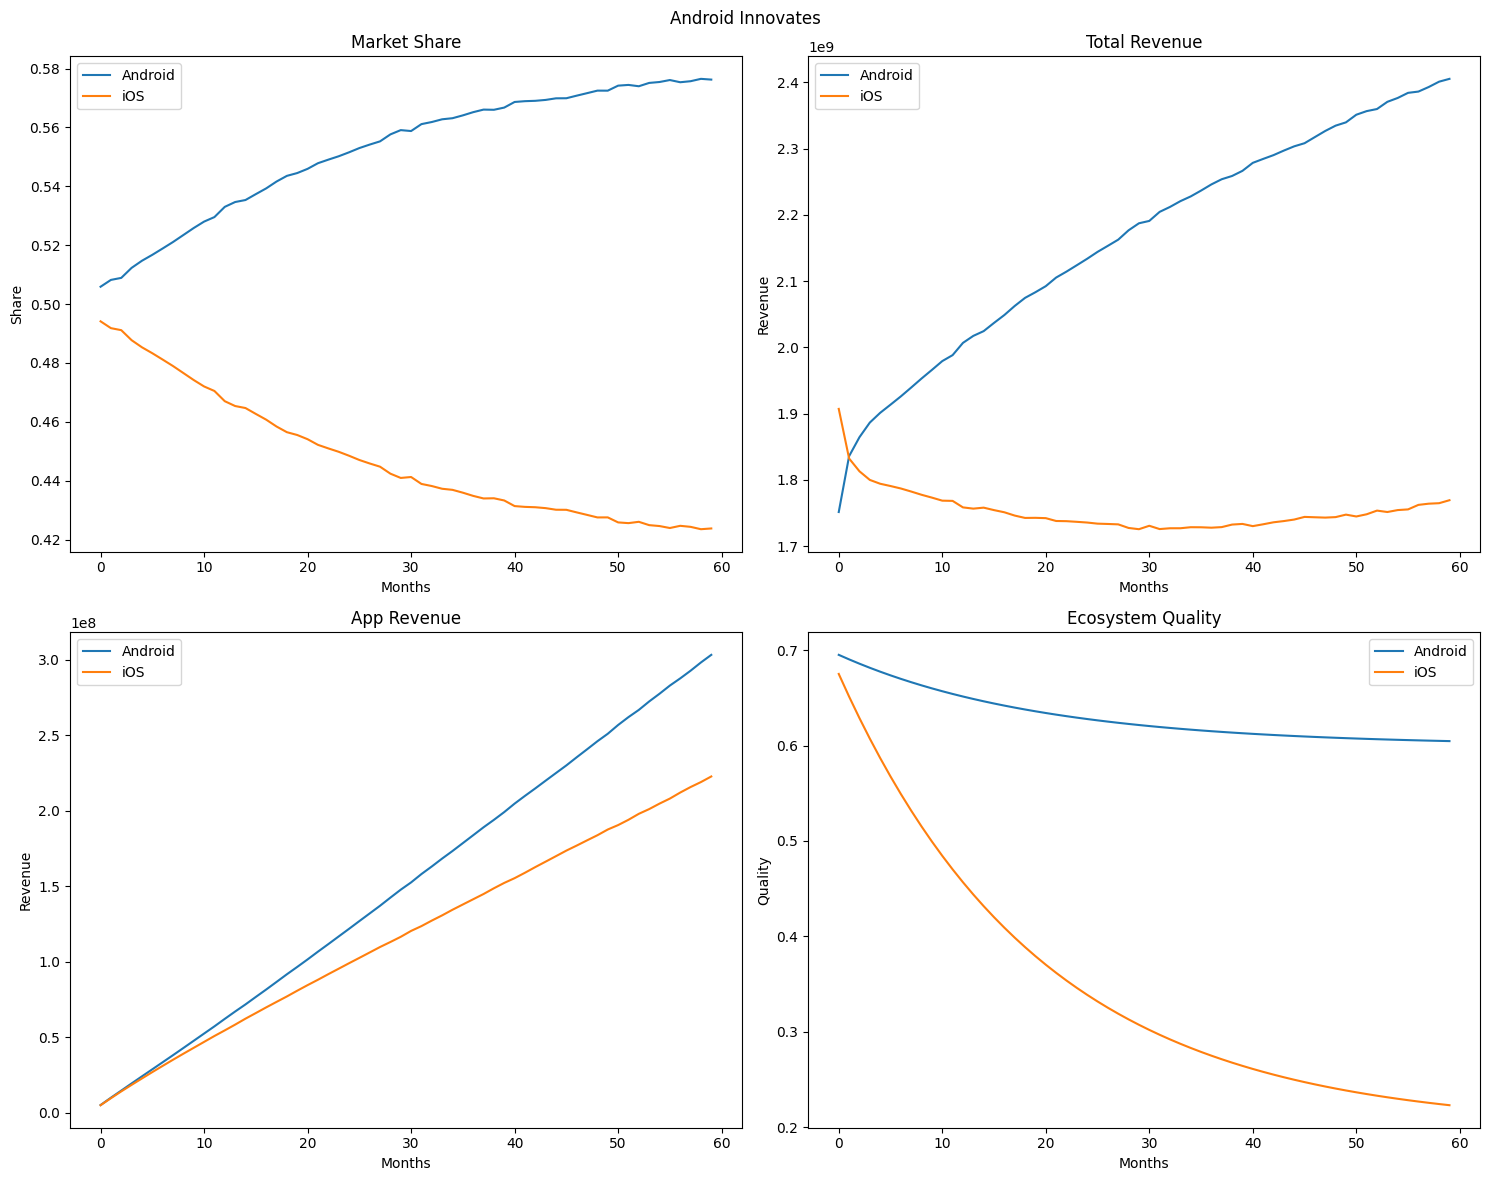


Final results for Android Innovates:
Android Market Share: 57.62%
iOS Market Share: 42.38%
Android Total Revenue: $2,405,120,768.00
iOS Total Revenue: $1,769,300,608.00
Android App Revenue: $303,124,288.00
iOS App Revenue: $222,585,504.00
Android Ecosystem Quality: 0.60
iOS Ecosystem Quality: 0.22


100%|██████████| 60/60 [00:00<00:00, 200.83it/s]


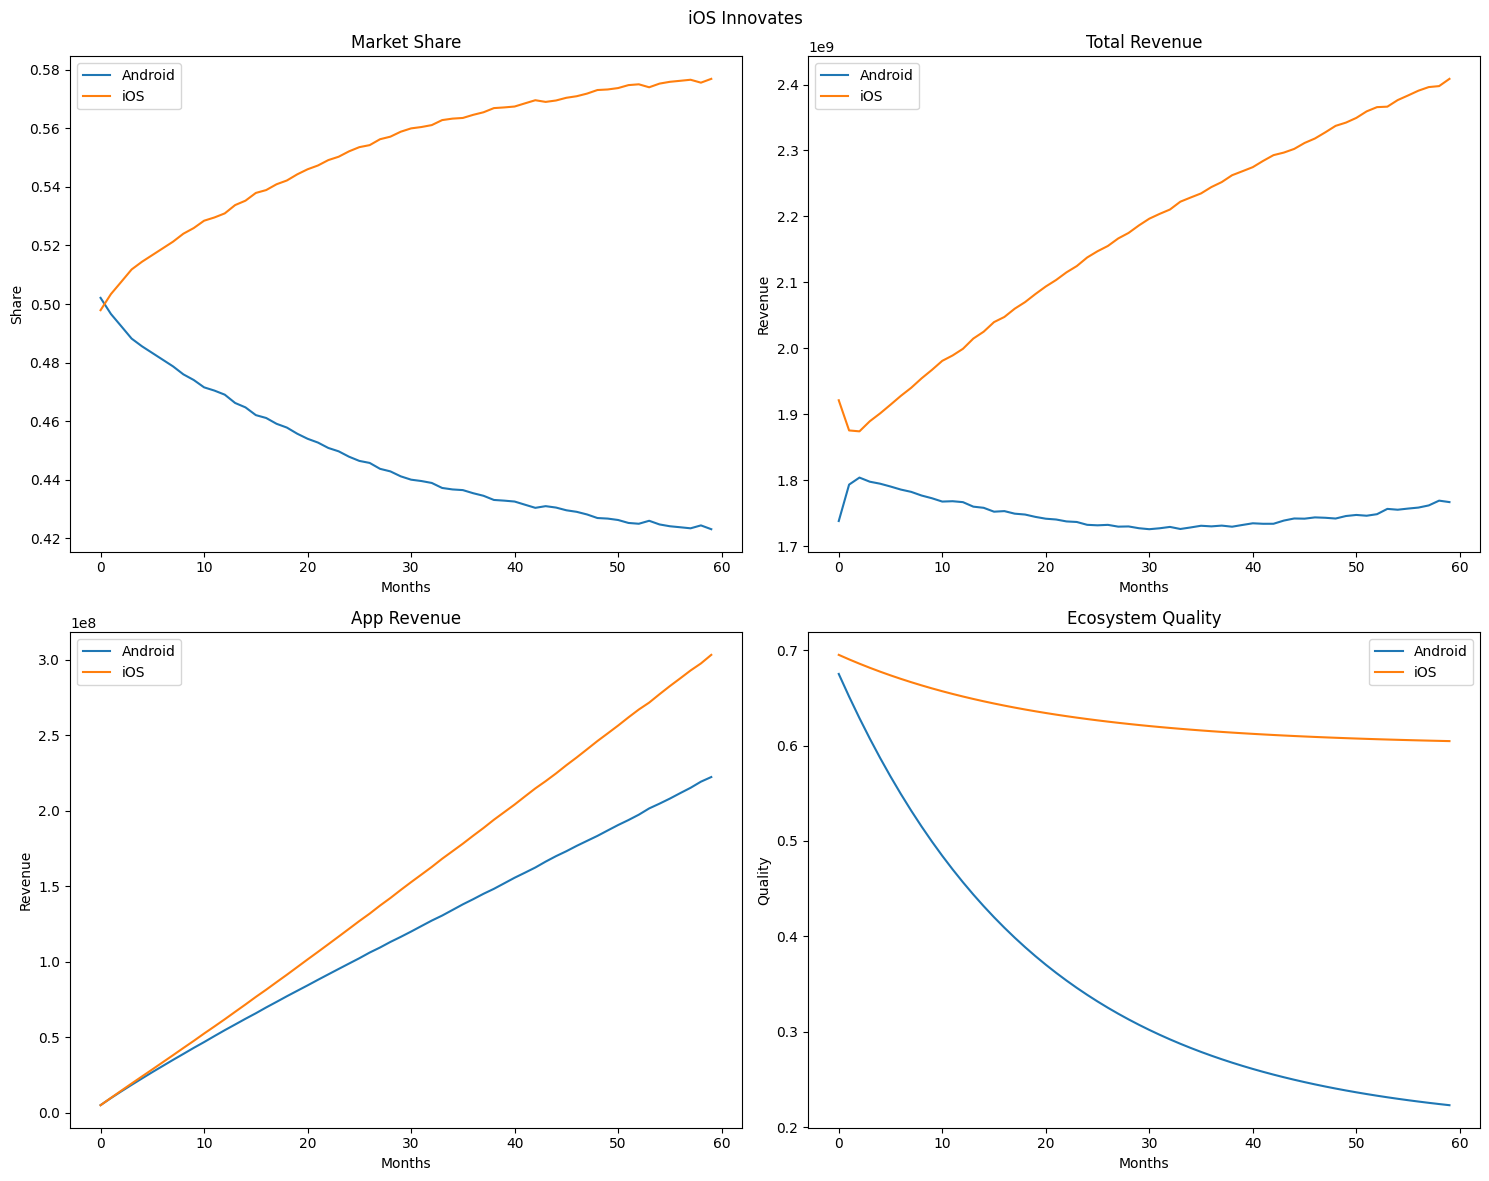


Final results for iOS Innovates:
Android Market Share: 42.31%
iOS Market Share: 57.69%
Android Total Revenue: $1,767,005,440.00
iOS Total Revenue: $2,408,583,424.00
Android App Revenue: $222,372,512.00
iOS App Revenue: $303,348,000.00
Android Ecosystem Quality: 0.22
iOS Ecosystem Quality: 0.60


In [ ]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import Dict, Any
from tqdm import tqdm

# Check if CUDA is available and set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load data (assuming CSV files are uploaded to Colab)
market_share = pd.read_csv('/content/market_share.csv')
key_statistics = pd.read_csv('/content/key-statistics.csv', index_col='Metric')
app_store_revenue = pd.read_csv('/content/app-store-revenue.csv')

class World:
    def __init__(self, num_agents: int):
        self.num_agents = num_agents
        self.initialize_agents()
        self.month = 0

    def initialize_agents(self):
        self.os = torch.randint(0, 2, (self.num_agents,), device=device)  # 0: Android, 1: iOS
        self.income = torch.where(
            self.os == 0,
            torch.normal(61000, 10000, (self.num_agents,), device=device),
            torch.normal(85000, 15000, (self.num_agents,), device=device)
        )
        self.tech_savviness = torch.rand(self.num_agents, device=device)
        self.brand_loyalty = torch.where(
            self.os == 0,
            torch.normal(0.89, 0.05, (self.num_agents,), device=device),
            torch.normal(0.87, 0.05, (self.num_agents,), device=device)
        )
        self.satisfaction = torch.rand(self.num_agents, device=device) * 0.5 + 0.5
        self.apps_purchased = torch.zeros(self.num_agents, device=device)
        self.money_spent = torch.zeros(self.num_agents, device=device)

        self.android_quality = torch.tensor(0.7, device=device)
        self.ios_quality = torch.tensor(0.7, device=device)
        self.android_innovation = torch.tensor(0.02, device=device)
        self.ios_innovation = torch.tensor(0.02, device=device)

    def update_ecosystem_quality(self):
        self.android_quality = torch.min(torch.tensor(1.0, device=device),
                                         self.android_quality * 0.95 + self.android_innovation)
        self.ios_quality = torch.min(torch.tensor(1.0, device=device),
                                     self.ios_quality * 0.95 + self.ios_innovation)

    def update_satisfaction(self):
        android_relative_quality = self.android_quality / (self.android_quality + self.ios_quality)
        ios_relative_quality = self.ios_quality / (self.android_quality + self.ios_quality)

        self.satisfaction = torch.where(
            self.os == 0,
            self.satisfaction * 0.7 + android_relative_quality * 0.2 + torch.rand(self.num_agents, device=device) * 0.1 - 0.05,
            self.satisfaction * 0.7 + ios_relative_quality * 0.2 + torch.rand(self.num_agents, device=device) * 0.1 - 0.05
        )
        self.satisfaction = torch.clamp(self.satisfaction, 0, 1)

    def simulate_app_purchases(self):
        num_potential_purchases = torch.randint(0, 6, (self.num_agents,), device=device)
        app_quality = torch.rand(self.num_agents, device=device) * 0.7 + 0.3
        app_price = torch.rand(self.num_agents, device=device) * 9 + 0.99

        purchase_probability = (
            self.satisfaction * 0.3 +
            self.tech_savviness * 0.2 +
            (1 - app_price / self.income) * 0.3 +
            app_quality * 0.2
        )

        purchases = torch.rand(self.num_agents, device=device) < purchase_probability
        self.apps_purchased += purchases * num_potential_purchases
        self.money_spent += purchases * num_potential_purchases * app_price

    def consider_switching(self):
        android_users = self.os == 0
        ios_users = self.os == 1

        android_switch_prob = torch.zeros_like(self.os, dtype=torch.float32, device=device)
        ios_switch_prob = torch.zeros_like(self.os, dtype=torch.float32, device=device)

        android_switch_prob[android_users] = (
            (1 - self.brand_loyalty[android_users]) * 0.4 +
            (1 - self.satisfaction[android_users]) * 0.4 +
            self.ios_quality * 0.2
        )
        ios_switch_prob[ios_users] = (
            (1 - self.brand_loyalty[ios_users]) * 0.4 +
            (1 - self.satisfaction[ios_users]) * 0.4 +
            self.android_quality * 0.2
        )

        switchers = torch.rand(self.num_agents, device=device) < torch.where(self.os == 0, android_switch_prob, ios_switch_prob)
        self.os[switchers] = 1 - self.os[switchers]

    def simulate_month(self):
        self.month += 1
        self.update_ecosystem_quality()
        self.update_satisfaction()
        self.simulate_app_purchases()
        self.consider_switching()

    def run_simulation(self, num_months: int) -> Dict[str, torch.Tensor]:
        results = {
            'android_share': torch.zeros(num_months, device=device),
            'ios_share': torch.zeros(num_months, device=device),
            'android_revenue': torch.zeros(num_months, device=device),
            'ios_revenue': torch.zeros(num_months, device=device),
            'android_app_revenue': torch.zeros(num_months, device=device),
            'ios_app_revenue': torch.zeros(num_months, device=device),
            'android_quality': torch.zeros(num_months, device=device),
            'ios_quality': torch.zeros(num_months, device=device)
        }

        for i in tqdm(range(num_months)):
            self.simulate_month()
            results['android_share'][i] = (self.os == 0).float().mean()
            results['ios_share'][i] = (self.os == 1).float().mean()
            results['android_revenue'][i] = self.income[self.os == 0].sum() * 0.05 + self.money_spent[self.os == 0].sum()
            results['ios_revenue'][i] = self.income[self.os == 1].sum() * 0.05 + self.money_spent[self.os == 1].sum()
            results['android_app_revenue'][i] = self.money_spent[self.os == 0].sum()
            results['ios_app_revenue'][i] = self.money_spent[self.os == 1].sum()
            results['android_quality'][i] = self.android_quality
            results['ios_quality'][i] = self.ios_quality

        return results

def run_scenario(scenario: Dict[str, Any]) -> Dict[str, torch.Tensor]:
    world = World(scenario['num_agents'])
    world.android_innovation = torch.tensor(scenario['android_innovation'], device=device)
    world.ios_innovation = torch.tensor(scenario['ios_innovation'], device=device)
    return world.run_simulation(scenario['num_months'])

def plot_results(results: Dict[str, torch.Tensor], title: str):
    fig, axs = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle(title)

    axs[0, 0].plot(results['android_share'].cpu().numpy(), label='Android')
    axs[0, 0].plot(results['ios_share'].cpu().numpy(), label='iOS')
    axs[0, 0].set_title('Market Share')
    axs[0, 0].set_ylabel('Share')
    axs[0, 0].legend()

    axs[0, 1].plot(results['android_revenue'].cpu().numpy(), label='Android')
    axs[0, 1].plot(results['ios_revenue'].cpu().numpy(), label='iOS')
    axs[0, 1].set_title('Total Revenue')
    axs[0, 1].set_ylabel('Revenue')
    axs[0, 1].legend()

    axs[1, 0].plot(results['android_app_revenue'].cpu().numpy(), label='Android')
    axs[1, 0].plot(results['ios_app_revenue'].cpu().numpy(), label='iOS')
    axs[1, 0].set_title('App Revenue')
    axs[1, 0].set_ylabel('Revenue')
    axs[1, 0].legend()

    axs[1, 1].plot(results['android_quality'].cpu().numpy(), label='Android')
    axs[1, 1].plot(results['ios_quality'].cpu().numpy(), label='iOS')
    axs[1, 1].set_title('Ecosystem Quality')
    axs[1, 1].set_ylabel('Quality')
    axs[1, 1].legend()

    for ax in axs.flat:
        ax.set_xlabel('Months')

    plt.tight_layout()
    plt.show()

# Define scenarios
scenarios = [
    {
        'name': 'Baseline',
        'num_agents': 1000000,
        'num_months': 60,
        'android_innovation': 0.02,
        'ios_innovation': 0.02
    },
    {
        'name': 'Android Innovates',
        'num_agents': 1000000,
        'num_months': 60,
        'android_innovation': 0.03,
        'ios_innovation': 0.01
    },
    {
        'name': 'iOS Innovates',
        'num_agents': 1000000,
        'num_months': 60,
        'android_innovation': 0.01,
        'ios_innovation': 0.03
    }
]

# Run scenarios and plot results
for scenario in scenarios:
    results = run_scenario(scenario)
    plot_results(results, scenario['name'])

    print(f"\nFinal results for {scenario['name']}:")
    print(f"Android Market Share: {results['android_share'][-1].item():.2%}")
    print(f"iOS Market Share: {results['ios_share'][-1].item():.2%}")
    print(f"Android Total Revenue: ${results['android_revenue'][-1].item():,.2f}")
    print(f"iOS Total Revenue: ${results['ios_revenue'][-1].item():,.2f}")
    print(f"Android App Revenue: ${results['android_app_revenue'][-1].item():,.2f}")
    print(f"iOS App Revenue: ${results['ios_app_revenue'][-1].item():,.2f}")
    print(f"Android Ecosystem Quality: {results['android_quality'][-1].item():.2f}")
    print(f"iOS Ecosystem Quality: {results['ios_quality'][-1].item():.2f}")

Using device: cuda


100%|██████████| 60/60 [00:00<00:00, 152.22it/s]


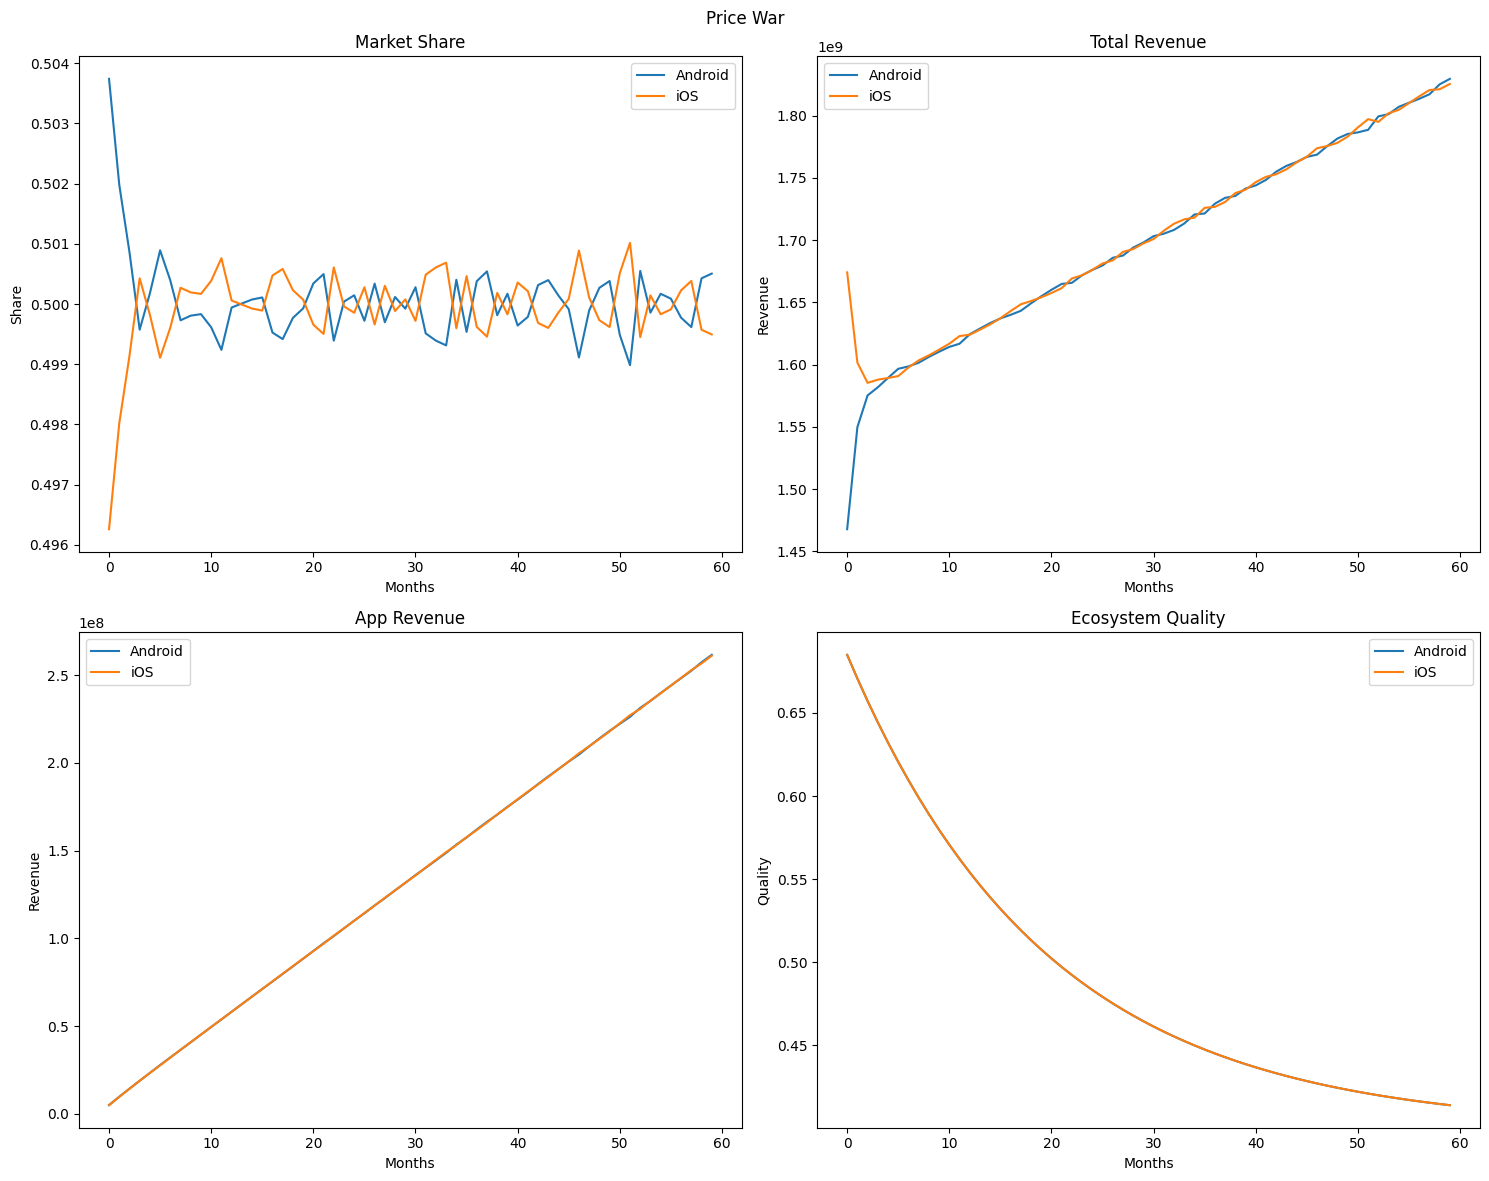


Final results for Price War:
Android Market Share: 50.05%
iOS Market Share: 49.95%
Android Total Revenue: $1,829,489,408.00
iOS Total Revenue: $1,825,396,480.00
Android App Revenue: $261,596,608.00
iOS App Revenue: $261,109,984.00
Android Ecosystem Quality: 0.41
iOS Ecosystem Quality: 0.41


100%|██████████| 60/60 [00:00<00:00, 107.49it/s]


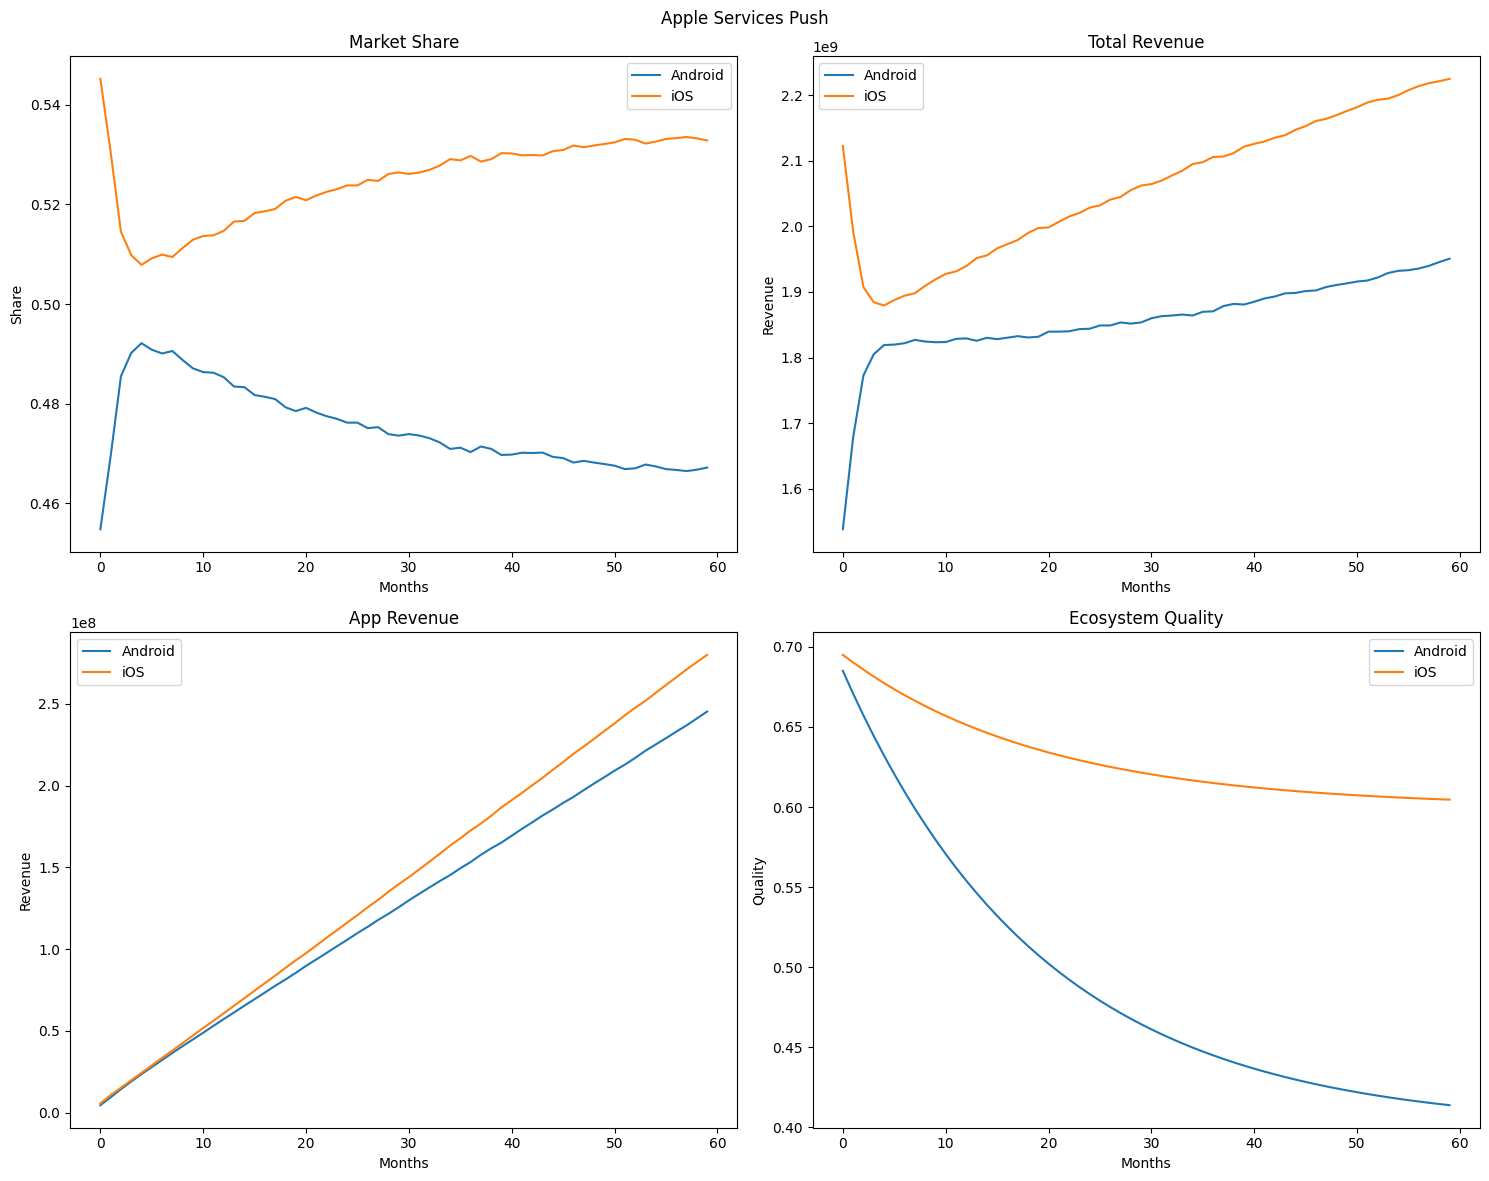


Final results for Apple Services Push:
Android Market Share: 46.71%
iOS Market Share: 53.29%
Android Total Revenue: $1,950,748,800.00
iOS Total Revenue: $2,224,907,776.00
Android App Revenue: $245,228,800.00
iOS App Revenue: $279,873,792.00
Android Ecosystem Quality: 0.41
iOS Ecosystem Quality: 0.60


100%|██████████| 60/60 [00:00<00:00, 186.34it/s]


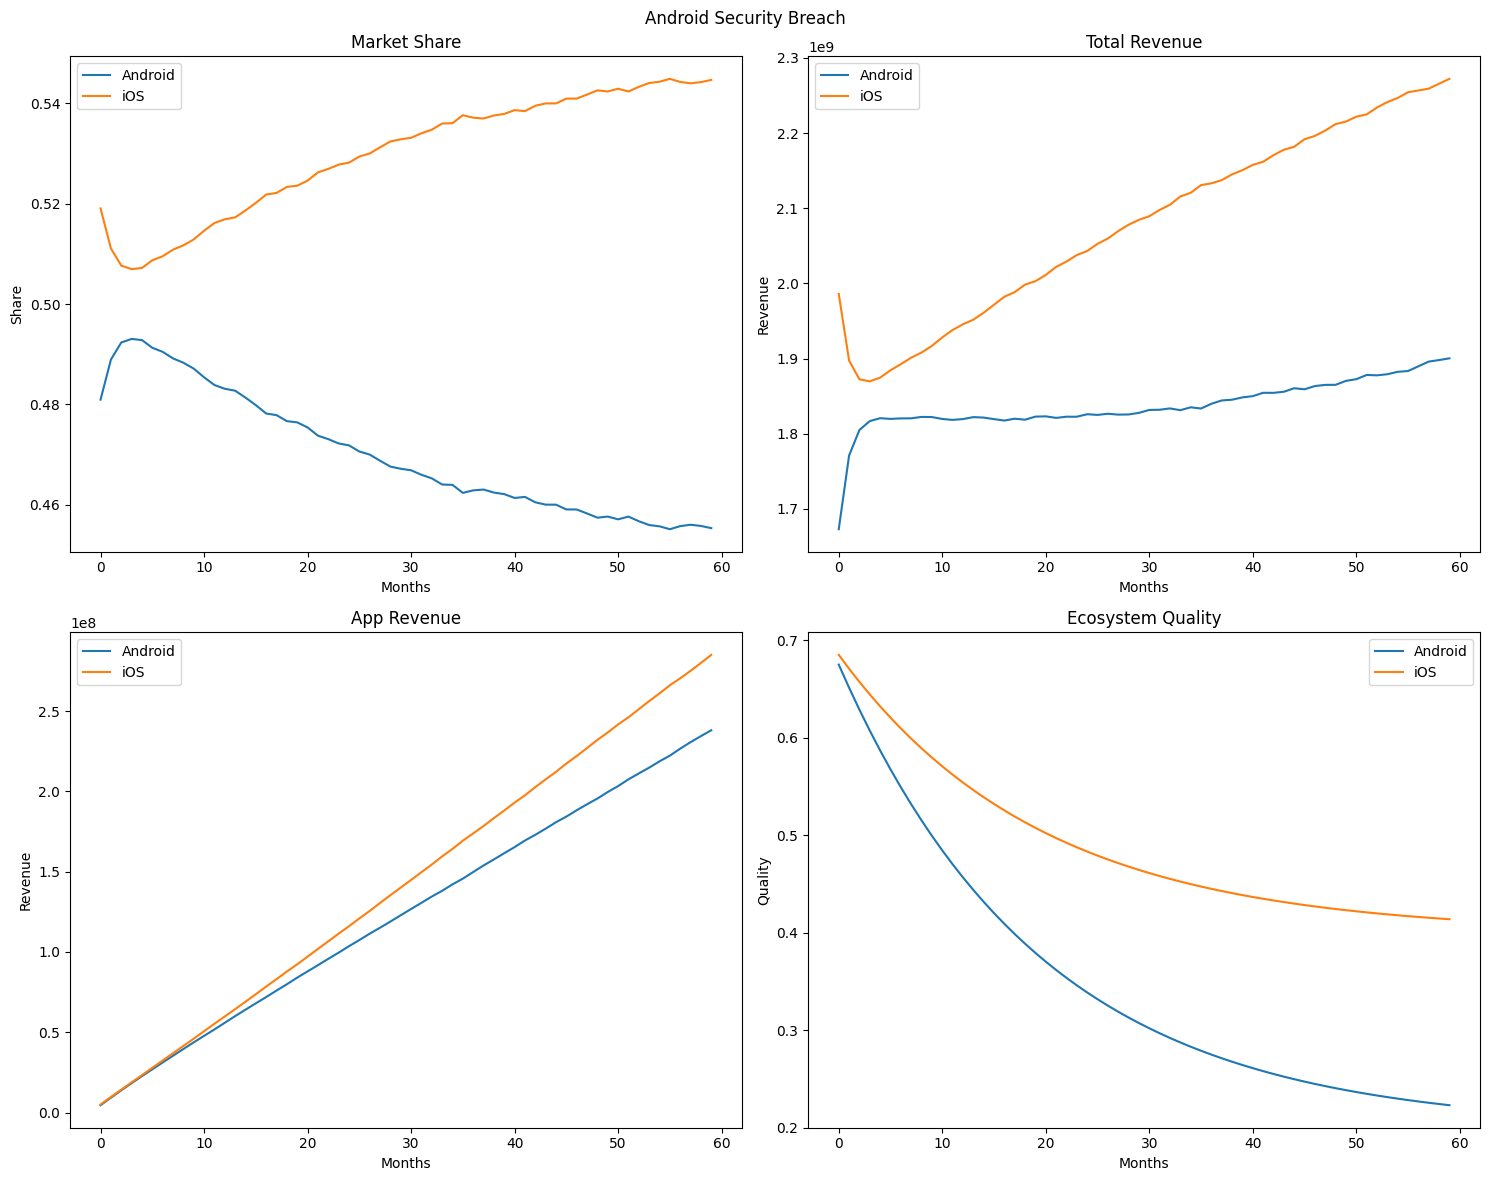


Final results for Android Security Breach:
Android Market Share: 45.54%
iOS Market Share: 54.46%
Android Total Revenue: $1,900,359,168.00
iOS Total Revenue: $2,272,085,760.00
Android App Revenue: $238,009,552.00
iOS App Revenue: $284,957,120.00
Android Ecosystem Quality: 0.22
iOS Ecosystem Quality: 0.41


100%|██████████| 60/60 [00:00<00:00, 214.62it/s]


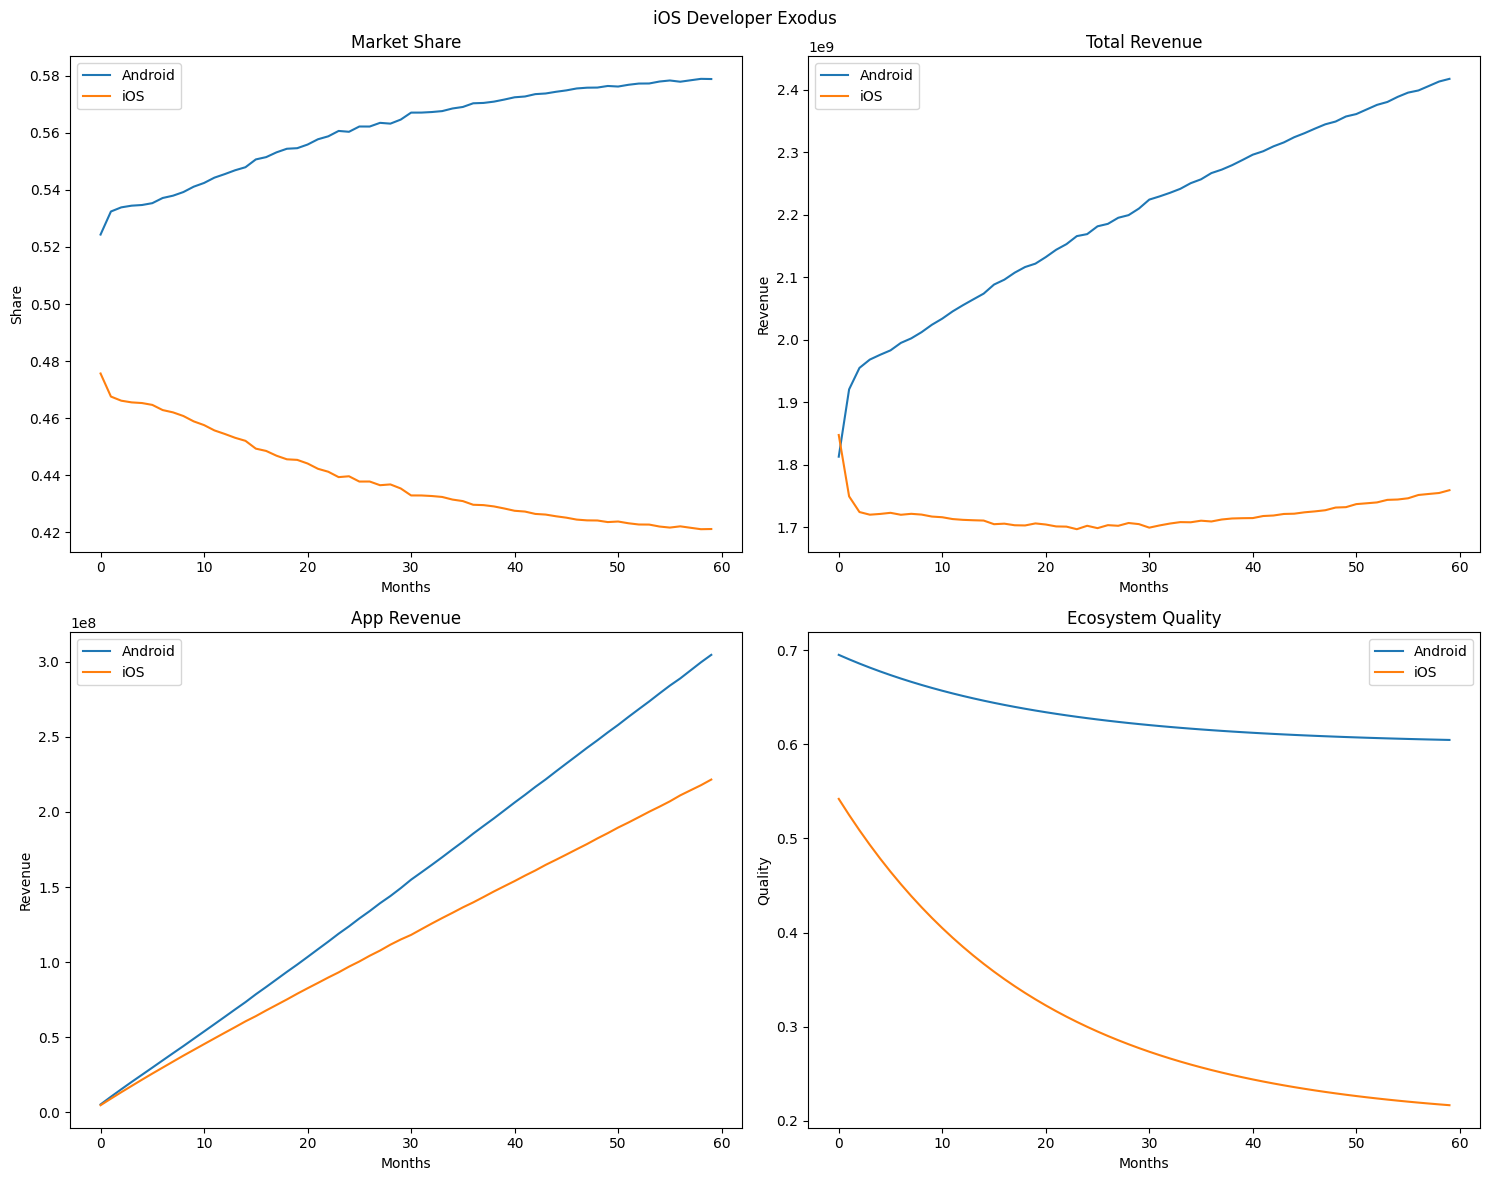


Final results for iOS Developer Exodus:
Android Market Share: 57.89%
iOS Market Share: 42.11%
Android Total Revenue: $2,417,445,632.00
iOS Total Revenue: $1,759,137,792.00
Android App Revenue: $304,611,072.00
iOS App Revenue: $221,560,992.00
Android Ecosystem Quality: 0.60
iOS Ecosystem Quality: 0.22


100%|██████████| 60/60 [00:00<00:00, 204.00it/s]


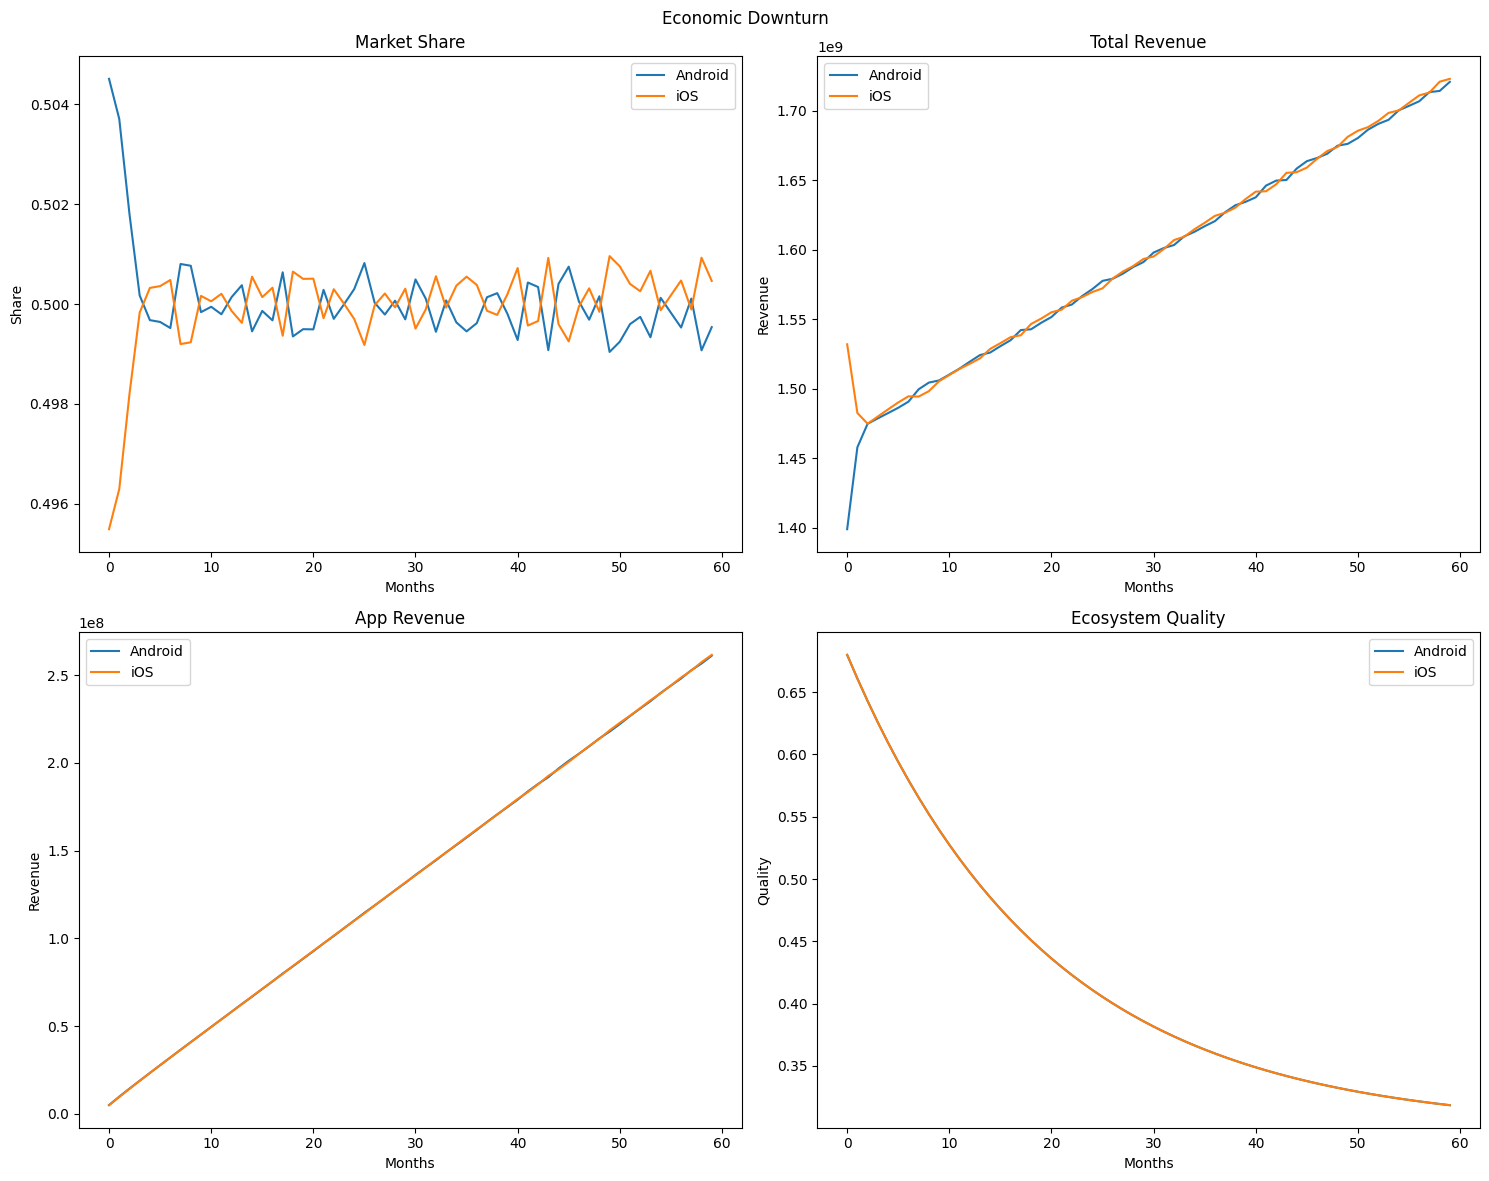


Final results for Economic Downturn:
Android Market Share: 49.95%
iOS Market Share: 50.05%
Android Total Revenue: $1,720,724,736.00
iOS Total Revenue: $1,722,858,240.00
Android App Revenue: $261,107,392.00
iOS App Revenue: $261,590,336.00
Android Ecosystem Quality: 0.32
iOS Ecosystem Quality: 0.32


In [ ]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import Dict, Any
from tqdm import tqdm

# Check if CUDA is available and set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

class World:
    def __init__(self, num_agents: int):
        self.num_agents = num_agents
        self.initialize_agents()
        self.month = 0

    def initialize_agents(self):
        self.os = torch.randint(0, 2, (self.num_agents,), device=device)  # 0: Android, 1: iOS
        self.income = torch.where(
            self.os == 0,
            torch.normal(61000, 10000, (self.num_agents,), device=device),
            torch.normal(85000, 15000, (self.num_agents,), device=device)
        )
        self.tech_savviness = torch.rand(self.num_agents, device=device)
        self.brand_loyalty = torch.where(
            self.os == 0,
            torch.normal(0.89, 0.05, (self.num_agents,), device=device),
            torch.normal(0.87, 0.05, (self.num_agents,), device=device)
        )
        self.satisfaction = torch.rand(self.num_agents, device=device) * 0.5 + 0.5
        self.apps_purchased = torch.zeros(self.num_agents, device=device)
        self.money_spent = torch.zeros(self.num_agents, device=device)

        self.android_quality = torch.tensor(0.7, device=device)
        self.ios_quality = torch.tensor(0.7, device=device)
        self.android_innovation = torch.tensor(0.02, device=device)
        self.ios_innovation = torch.tensor(0.02, device=device)

    def update_ecosystem_quality(self):
        self.android_quality = torch.min(torch.tensor(1.0, device=device),
                                         self.android_quality * 0.95 + self.android_innovation)
        self.ios_quality = torch.min(torch.tensor(1.0, device=device),
                                     self.ios_quality * 0.95 + self.ios_innovation)

    def update_satisfaction(self):
        android_relative_quality = self.android_quality / (self.android_quality + self.ios_quality)
        ios_relative_quality = self.ios_quality / (self.android_quality + self.ios_quality)

        self.satisfaction = torch.where(
            self.os == 0,
            self.satisfaction * 0.7 + android_relative_quality * 0.2 + torch.rand(self.num_agents, device=device) * 0.1 - 0.05,
            self.satisfaction * 0.7 + ios_relative_quality * 0.2 + torch.rand(self.num_agents, device=device) * 0.1 - 0.05
        )
        self.satisfaction = torch.clamp(self.satisfaction, 0, 1)

    def simulate_app_purchases(self):
        num_potential_purchases = torch.randint(0, 6, (self.num_agents,), device=device)
        app_quality = torch.rand(self.num_agents, device=device) * 0.7 + 0.3
        app_price = torch.rand(self.num_agents, device=device) * 9 + 0.99

        purchase_probability = (
            self.satisfaction * 0.3 +
            self.tech_savviness * 0.2 +
            (1 - app_price / self.income) * 0.3 +
            app_quality * 0.2
        )

        purchases = torch.rand(self.num_agents, device=device) < purchase_probability
        self.apps_purchased += purchases * num_potential_purchases
        self.money_spent += purchases * num_potential_purchases * app_price

    def consider_switching(self):
        android_users = self.os == 0
        ios_users = self.os == 1

        android_switch_prob = torch.zeros_like(self.os, dtype=torch.float32, device=device)
        ios_switch_prob = torch.zeros_like(self.os, dtype=torch.float32, device=device)

        android_switch_prob[android_users] = (
            (1 - self.brand_loyalty[android_users]) * 0.4 +
            (1 - self.satisfaction[android_users]) * 0.4 +
            self.ios_quality * 0.2
        )
        ios_switch_prob[ios_users] = (
            (1 - self.brand_loyalty[ios_users]) * 0.4 +
            (1 - self.satisfaction[ios_users]) * 0.4 +
            self.android_quality * 0.2
        )

        switchers = torch.rand(self.num_agents, device=device) < torch.where(self.os == 0, android_switch_prob, ios_switch_prob)
        self.os[switchers] = 1 - self.os[switchers]

    def simulate_month(self):
        self.month += 1
        self.update_ecosystem_quality()
        self.update_satisfaction()
        self.simulate_app_purchases()
        self.consider_switching()

    def run_simulation(self, num_months: int) -> Dict[str, torch.Tensor]:
        results = {
            'android_share': torch.zeros(num_months, device=device),
            'ios_share': torch.zeros(num_months, device=device),
            'android_revenue': torch.zeros(num_months, device=device),
            'ios_revenue': torch.zeros(num_months, device=device),
            'android_app_revenue': torch.zeros(num_months, device=device),
            'ios_app_revenue': torch.zeros(num_months, device=device),
            'android_quality': torch.zeros(num_months, device=device),
            'ios_quality': torch.zeros(num_months, device=device)
        }

        for i in tqdm(range(num_months)):
            self.simulate_month()
            results['android_share'][i] = (self.os == 0).float().mean()
            results['ios_share'][i] = (self.os == 1).float().mean()
            results['android_revenue'][i] = self.income[self.os == 0].sum() * 0.05 + self.money_spent[self.os == 0].sum()
            results['ios_revenue'][i] = self.income[self.os == 1].sum() * 0.05 + self.money_spent[self.os == 1].sum()
            results['android_app_revenue'][i] = self.money_spent[self.os == 0].sum()
            results['ios_app_revenue'][i] = self.money_spent[self.os == 1].sum()
            results['android_quality'][i] = self.android_quality
            results['ios_quality'][i] = self.ios_quality

        return results

def run_scenario(scenario: Dict[str, Any]) -> Dict[str, torch.Tensor]:
    world = World(scenario['num_agents'])
    world.android_innovation = torch.tensor(scenario['android_innovation'], device=device)
    world.ios_innovation = torch.tensor(scenario['ios_innovation'], device=device)

    # Apply scenario-specific modifications
    if 'android_price_factor' in scenario:
        world.income[world.os == 0] *= scenario['android_price_factor']
    if 'ios_price_factor' in scenario:
        world.income[world.os == 1] *= scenario['ios_price_factor']
    if 'ios_services_factor' in scenario:
        world.satisfaction[world.os == 1] *= scenario['ios_services_factor']
    if 'android_security_impact' in scenario:
        world.satisfaction[world.os == 0] *= scenario['android_security_impact']
    if 'ios_app_quantity_factor' in scenario:
        world.ios_quality *= scenario['ios_app_quantity_factor']
    if 'income_reduction_factor' in scenario:
        world.income *= scenario['income_reduction_factor']

    return world.run_simulation(scenario['num_months'])

def plot_results(results: Dict[str, torch.Tensor], title: str):
    fig, axs = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle(title)

    axs[0, 0].plot(results['android_share'].cpu().numpy(), label='Android')
    axs[0, 0].plot(results['ios_share'].cpu().numpy(), label='iOS')
    axs[0, 0].set_title('Market Share')
    axs[0, 0].set_ylabel('Share')
    axs[0, 0].legend()

    axs[0, 1].plot(results['android_revenue'].cpu().numpy(), label='Android')
    axs[0, 1].plot(results['ios_revenue'].cpu().numpy(), label='iOS')
    axs[0, 1].set_title('Total Revenue')
    axs[0, 1].set_ylabel('Revenue')
    axs[0, 1].legend()

    axs[1, 0].plot(results['android_app_revenue'].cpu().numpy(), label='Android')
    axs[1, 0].plot(results['ios_app_revenue'].cpu().numpy(), label='iOS')
    axs[1, 0].set_title('App Revenue')
    axs[1, 0].set_ylabel('Revenue')
    axs[1, 0].legend()

    axs[1, 1].plot(results['android_quality'].cpu().numpy(), label='Android')
    axs[1, 1].plot(results['ios_quality'].cpu().numpy(), label='iOS')
    axs[1, 1].set_title('Ecosystem Quality')
    axs[1, 1].set_ylabel('Quality')
    axs[1, 1].legend()

    for ax in axs.flat:
        ax.set_xlabel('Months')

    plt.tight_layout()
    plt.show()

# Define scenarios
scenarios = [
    {
        'name': 'Price War',
        'num_agents': 1000000,
        'num_months': 60,
        'android_innovation': 0.02,
        'ios_innovation': 0.02,
        'android_price_factor': 0.8,
        'ios_price_factor': 0.9
    },
    {
        'name': 'Apple Services Push',
        'num_agents': 1000000,
        'num_months': 60,
        'android_innovation': 0.02,
        'ios_innovation': 0.03,
        'ios_services_factor': 1.5
    },
    {
        'name': 'Android Security Breach',
        'num_agents': 1000000,
        'num_months': 60,
        'android_innovation': 0.01,
        'ios_innovation': 0.02,
        'android_security_impact': 0.8
    },
    {
        'name': 'iOS Developer Exodus',
        'num_agents': 1000000,
        'num_months': 60,
        'android_innovation': 0.03,
        'ios_innovation': 0.01,
        'ios_app_quantity_factor': 0.8
    },
    {
        'name': 'Economic Downturn',
        'num_agents': 1000000,
        'num_months': 60,
        'android_innovation': 0.015,
        'ios_innovation': 0.015,
        'income_reduction_factor': 0.8
    }
]

# Run scenarios and plot results
for scenario in scenarios:
    results = run_scenario(scenario)
    plot_results(results, scenario['name'])

    print(f"\nFinal results for {scenario['name']}:")
    print(f"Android Market Share: {results['android_share'][-1].item():.2%}")
    print(f"iOS Market Share: {results['ios_share'][-1].item():.2%}")
    print(f"Android Total Revenue: ${results['android_revenue'][-1].item():,.2f}")
    print(f"iOS Total Revenue: ${results['ios_revenue'][-1].item():,.2f}")
    print(f"Android App Revenue: ${results['android_app_revenue'][-1].item():,.2f}")
    print(f"iOS App Revenue: ${results['ios_app_revenue'][-1].item():,.2f}")
    print(f"Android Ecosystem Quality: {results['android_quality'][-1].item():.2f}")
    print(f"iOS Ecosystem Quality: {results['ios_quality'][-1].item():.2f}")


In [ ]:
# Install required libraries
!pip install mesa groq

# Import necessary libraries
import mesa
import random
import groq
import os

# Set up Groq client (you'll need to set your API key as an environment variable)
os.environ["GROQ_API_KEY"] = "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"
client = groq.Groq()

# Define the UserAgent class
class UserAgent(mesa.Agent):
    def __init__(self, unique_id, model, os_preference):
        super().__init__(unique_id, model)
        self.os_preference = os_preference
        self.satisfaction = random.uniform(0, 1)

    def step(self):
        # This is where the agent's behavior will be defined
        pass

# Define the OSModel class
class OSModel(mesa.Model):
    def __init__(self, N):
        self.num_agents = N
        self.schedule = mesa.time.RandomActivation(self)

        for i in range(self.num_agents):
            os_preference = random.choice(["iOS", "Android"])
            a = UserAgent(i, self, os_preference)
            self.schedule.add(a)

    def step(self):
        self.schedule.step()

# Create and run the model
model = OSModel(100)  # Start with 100 agents
for i in range(10):  # Run for 10 steps
    model.step()

# You'll add more code here to analyze the results and visualize the data

In [ ]:
%%writefile ios_android_simulation.ipynb

{
  "nbformat": 4,
  "nbformat_minor": 0,
  "metadata": {
    "colab": {
      "name": "iOS vs Android Simulation",
      "provenance": [],
      "authorship_tag": "ABX9TyOVBG6yjKd+y9lBs8QfbiiT"
    },
    "kernelspec": {
      "name": "python3",
      "display_name": "Python 3"
    },
    "language_info": {
      "name": "python"
    }
  },
  "cells": [
    {
      "cell_type": "markdown",
      "source": [
        "# iOS vs Android Agent-Based Simulation\n",
        "\n",
        "This notebook implements an agent-based simulation of the iOS vs Android market using Mesa and LLMs (via Groq API)."
      ],
      "metadata": {
        "id": "U-jZYT9N7pJ_"
      }
    },
    {
      "cell_type": "code",
      "execution_count": null,
      "metadata": {
        "id": "8p6a7w0J7nXq"
      },
      "outputs": [],
      "source": [
        "# Install required libraries\n",
        "!pip install mesa groq"
      ]
    },
    {
      "cell_type": "code",
      "source": [
        "# Import necessary libraries\n",
        "import mesa\n",
        "import random\n",
        "import groq\n",
        "import os\n",
        "import matplotlib.pyplot as plt\n",
        "\n",
        "# Set up Groq client (you'll need to set your API key)\n",
        "os.environ[\"GROQ_API_KEY\"] = \"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\"\n",
        "client = groq.Groq()"
      ],
      "metadata": {
        "id": "Q1wz8ZxX7sSN"
      },
      "execution_count": null,
      "outputs": []
    },
    {
      "cell_type": "code",
      "source": [
        "# Define the UserAgent class\n",
        "class UserAgent(mesa.Agent):\n",
        "    def __init__(self, unique_id, model, os_preference):\n",
        "        super().__init__(unique_id, model)\n",
        "        self.os_preference = os_preference\n",
        "        self.satisfaction = random.uniform(0, 1)\n",
        "        self.age = random.randint(18, 70)\n",
        "        self.income = random.randint(20000, 150000)\n",
        "\n",
        "    def get_llm_opinion(self):\n",
        "        prompt = f\"\"\"\n",
        "        You are a {self.age}-year-old user with an annual income of ${self.income}.\n",
        "        Your current OS preference is {self.os_preference}, and your satisfaction level is {self.satisfaction:.2f}.\n",
        "        Based on these factors, should you consider switching to the other OS? Why or why not?\n",
        "        Provide a brief explanation and a decision (Switch/Stay).\n",
        "        \"\"\"\n",
        "        \n",
        "        response = client.chat.completions.create(\n",
        "            messages=[{\"role\": \"user\", \"content\": prompt}],\n",
        "            model=\"llama3.1-7b\",\n",
        "            max_tokens=100\n",
        "        )\n",
        "        \n",
        "        return response.choices[0].message.content\n",
        "\n",
        "    def step(self):\n",
        "        llm_opinion = self.get_llm_opinion()\n",
        "        \n",
        "        if \"Switch\" in llm_opinion:\n",
        "            self.os_preference = \"iOS\" if self.os_preference == \"Android\" else \"Android\"\n",
        "            self.satisfaction = random.uniform(0.5, 1)  # Higher satisfaction after switch\n",
        "        else:\n",
        "            self.satisfaction *= random.uniform(0.95, 1.05)  # Slight random change in satisfaction\n",
        "        \n",
        "        self.satisfaction = max(0, min(1, self.satisfaction))  # Ensure satisfaction stays between 0 and 1"
      ],
      "metadata": {
        "id": "ZXv-yiZ17uRt"
      },
      "execution_count": null,
      "outputs": []
    },
    {
      "cell_type": "code",
      "source": [
        "# Define the OSModel class\n",
        "class OSModel(mesa.Model):\n",
        "    def __init__(self, N):\n",
        "        self.num_agents = N\n",
        "        self.schedule = mesa.time.RandomActivation(self)\n",
        "        self.datacollector = mesa.DataCollector(\n",
        "            model_reporters={\"iOS_Share\": self.ios_share,\n",
        "                             \"Android_Share\": self.android_share,\n",
        "                             \"Avg_Satisfaction\": self.avg_satisfaction},\n",
        "            agent_reporters={\"OS\": \"os_preference\",\n",
        "                             \"Satisfaction\": \"satisfaction\"}\n",
        "        )\n",
        "        \n",
        "        for i in range(self.num_agents):\n",
        "            os_preference = random.choice([\"iOS\", \"Android\"])\n",
        "            a = UserAgent(i, self, os_preference)\n",
        "            self.schedule.add(a)\n",
        "        \n",
        "        self.datacollector.collect(self)\n",
        "\n",
        "    def step(self):\n",
        "        self.schedule.step()\n",
        "        self.datacollector.collect(self)\n",
        "\n",
        "    def ios_share(self):\n",
        "        ios_users = sum(1 for agent in self.schedule.agents if agent.os_preference == \"iOS\")\n",
        "        return ios_users / self.num_agents\n",
        "\n",
        "    def android_share(self):\n",
        "        return 1 - self.ios_share()\n",
        "\n",
        "    def avg_satisfaction(self):\n",
        "        return sum(agent.satisfaction for agent in self.schedule.agents) / self.num_agents"
      ],
      "metadata": {
        "id": "Hb5mQ5uL7wKl"
      },
      "execution_count": null,
      "outputs": []
    },
    {
      "cell_type": "code",
      "source": [
        "# Run the simulation\n",
        "model = OSModel(100)  # Start with 100 agents\n",
        "for i in range(10):  # Run for 10 steps\n",
        "    model.step()\n",
        "\n",
        "# Collect and plot the data\n",
        "model_data = model.datacollector.get_model_vars_dataframe()\n",
        "\n",
        "plt.figure(figsize=(12, 6))\n",
        "plt.plot(model_data.index, model_data[\"iOS_Share\"], label=\"iOS Share\")\n",
        "plt.plot(model_data.index, model_data[\"Android_Share\"], label=\"Android Share\")\n",
        "plt.plot(model_data.index, model_data[\"Avg_Satisfaction\"], label=\"Avg Satisfaction\")\n",
        "plt.xlabel(\"Step\")\n",
        "plt.ylabel(\"Value\")\n",
        "plt.title(\"OS Market Share and User Satisfaction Over Time\")\n",
        "plt.legend()\n",
        "plt.show()\n",
        "\n",
        "# Additional analysis\n",
        "agent_data = model.datacollector.get_agent_vars_dataframe()\n",
        "print(agent_data.groupby(\"OS\").mean())"
      ],
      "metadata": {
        "id": "G_Gs2QOU7yFN"
      },
      "execution_count": null,
      "outputs": []
    }
  ]
}


Writing ios_android_simulation.ipynb


In [ ]:
# Install required libraries
# !pip install mesa groq

# Import necessary libraries
import mesa
import random
import groq
import os
import matplotlib.pyplot as plt

# Set up Groq client (you'll need to set your API key)
os.environ["GROQ_API_KEY"] = "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"
client = groq.Groq()

# Install required libraries

import time
from tenacity import retry, stop_after_attempt, wait_exponential



# Define retry decorator for API calls
@retry(stop=stop_after_attempt(3), wait=wait_exponential(multiplier=1, min=4, max=10))
def get_llm_response(prompt):
    response = client.chat.completions.create(
        messages=[{"role": "user", "content": prompt}],
        model="llama-3.1-8b-instant	",
        max_tokens=100
    )
    return response.choices[0].message.content

# Define the UserAgent class
class UserAgent(mesa.Agent):
    def __init__(self, unique_id, model, os_preference):
        super().__init__(unique_id, model)
        self.os_preference = os_preference
        self.satisfaction = random.uniform(0, 1)
        self.age = random.randint(18, 70)
        self.income = random.randint(20000, 150000)

    def get_llm_opinion(self):
        prompt = f"""
        You are a {self.age}-year-old user with an annual income of ${self.income}.
        Your current OS preference is {self.os_preference}, and your satisfaction level is {self.satisfaction:.2f}.
        Based on these factors, should you consider switching to the other OS? Why or why not?
        Provide a brief explanation and a decision (Switch/Stay).
        """

        try:
            return get_llm_response(prompt)
        except Exception as e:
            print(f"Error getting LLM opinion: {e}")
            return "Stay"  # Default to staying if there's an error

    def step(self):
        llm_opinion = self.get_llm_opinion()

        if "Switch" in llm_opinion:
            self.os_preference = "iOS" if self.os_preference == "Android" else "Android"
            self.satisfaction = random.uniform(0.5, 1)  # Higher satisfaction after switch
        else:
            self.satisfaction *= random.uniform(0.95, 1.05)  # Slight random change in satisfaction

        self.satisfaction = max(0, min(1, self.satisfaction))  # Ensure satisfaction stays between 0 and 1

# Define the OSModel class
class OSModel(mesa.Model):
    def __init__(self, N):
        super().__init__()  # Explicitly initialize the Mesa Model
        self.num_agents = N
        self.schedule = mesa.time.RandomActivation(self)
        self.datacollector = mesa.DataCollector(
            model_reporters={"iOS_Share": self.ios_share,
                             "Android_Share": self.android_share,
                             "Avg_Satisfaction": self.avg_satisfaction},
            agent_reporters={"OS": "os_preference",
                             "Satisfaction": "satisfaction"}
        )

        for i in range(self.num_agents):
            os_preference = random.choice(["iOS", "Android"])
            a = UserAgent(i, self, os_preference)
            self.schedule.add(a)

        self.datacollector.collect(self)

    def step(self):
        self.schedule.step()
        self.datacollector.collect(self)

    def ios_share(self):
        ios_users = sum(1 for agent in self.schedule.agents if agent.os_preference == "iOS")
        return ios_users / self.num_agents

    def android_share(self):
        return 1 - self.ios_share()

    def avg_satisfaction(self):
        return sum(agent.satisfaction for agent in self.schedule.agents) / self.num_agents

# Run the simulation
model = OSModel(100)  # Start with 100 agents
for i in range(10):  # Run for 10 steps
    print(f"Step {i+1}")
    model.step()
    time.sleep(1)  # Add a small delay between steps to avoid overwhelming the API

# Collect and plot the data
model_data = model.datacollector.get_model_vars_dataframe()

plt.figure(figsize=(12, 6))
plt.plot(model_data.index, model_data["iOS_Share"], label="iOS Share")
plt.plot(model_data.index, model_data["Android_Share"], label="Android Share")
plt.plot(model_data.index, model_data["Avg_Satisfaction"], label="Avg Satisfaction")
plt.xlabel("Step")
plt.ylabel("Value")
plt.title("OS Market Share and User Satisfaction Over Time")
plt.legend()
plt.show()

# Additional analysis
agent_data = model.datacollector.get_agent_vars_dataframe()
print(agent_data.groupby("OS").mean())

Step 1
Error getting LLM opinion: RetryError[<Future at 0x7ff185bdbe50 state=finished raised NotFoundError>]


KeyboardInterrupt: 

In [ ]:
!pip install llama-index

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 62.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.2/180.2 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.9/362.9 kB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.8/295.8 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 52.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 4.3 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0
  Attempting uninstall: nltk
    Found existing installation: nltk 3.8.1
    Uninstalling nltk-3.8.1:
      Successfully uninstall

In [ ]:
!pip install llama-index-llms-groq

Step 1
Step 2
Step 3
Step 4
Step 5


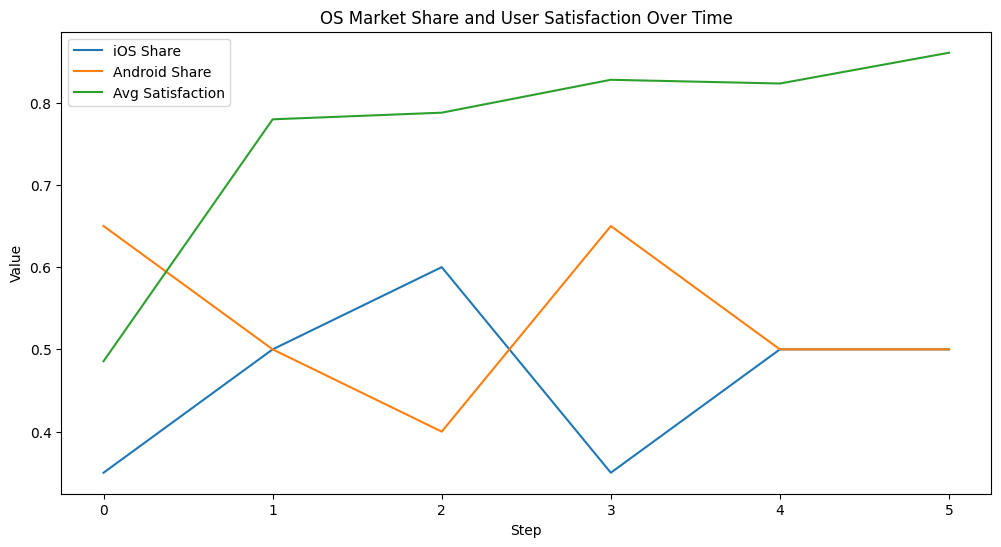

         Satisfaction
OS                   
Android      0.793273
iOS          0.723778


In [ ]:
# Install required libraries


# Import necessary libraries
import mesa
import random
import os
import matplotlib.pyplot as plt
from llama_index.core.llms import ChatMessage
from llama_index.llms.groq import Groq

# Set up Groq client (you'll need to set your API key)
os.environ["GROQ_API_KEY"] = "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"
llm = Groq(model="llama-3.1-8b-instant")

# Define the UserAgent class
class UserAgent(mesa.Agent):
    def __init__(self, unique_id, model, os_preference):
        super().__init__(unique_id, model)
        self.os_preference = os_preference
        self.satisfaction = random.uniform(0, 1)
        self.age = random.randint(18, 70)
        self.income = random.randint(20000, 1500000)

    def get_llm_opinion(self):
        messages = [
            ChatMessage(
                role="system",
                content="You are an AI assistant helping a user decide whether to switch mobile operating systems."
            ),
            ChatMessage(
                role="user",
                content=f"I am a {self.age}-year-old user with an annual income of ${self.income}. "
                        f"My current OS preference is {self.os_preference}, and my satisfaction level is {self.satisfaction:.2f}. "
                        f"Based on these factors, should I consider switching to the other OS? "
                        f"Provide a brief explanation and a decision (Switch/Stay)."
            )
        ]

        try:
            resp = llm.chat(messages)
            return resp.message.content
        except Exception as e:
            print(f"Error getting LLM opinion: {e}")
            return "Stay"  # Default to staying if there's an error

    def step(self):
        llm_opinion = self.get_llm_opinion()

        if "Switch" in llm_opinion:
            self.os_preference = "iOS" if self.os_preference == "Android" else "Android"
            self.satisfaction = random.uniform(0.5, 1)  # Higher satisfaction after switch
        else:
            self.satisfaction *= random.uniform(0.95, 1.05)  # Slight random change in satisfaction

        self.satisfaction = max(0, min(1, self.satisfaction))  # Ensure satisfaction stays between 0 and 1

# Define the OSModel class
class OSModel(mesa.Model):
    def __init__(self, N):
        super().__init__()
        self.num_agents = N
        self.schedule = mesa.time.RandomActivation(self)
        self.datacollector = mesa.DataCollector(
            model_reporters={"iOS_Share": self.ios_share,
                             "Android_Share": self.android_share,
                             "Avg_Satisfaction": self.avg_satisfaction},
            agent_reporters={"OS": "os_preference",
                             "Satisfaction": "satisfaction"}
        )

        for i in range(self.num_agents):
            os_preference = random.choice(["iOS", "Android"])
            a = UserAgent(i, self, os_preference)
            self.schedule.add(a)

        self.datacollector.collect(self)

    def step(self):
        self.schedule.step()
        self.datacollector.collect(self)

    def ios_share(self):
        ios_users = sum(1 for agent in self.schedule.agents if agent.os_preference == "iOS")
        return ios_users / self.num_agents

    def android_share(self):
        return 1 - self.ios_share()

    def avg_satisfaction(self):
        return sum(agent.satisfaction for agent in self.schedule.agents) / self.num_agents

# Run the simulation
model = OSModel(20)  # Start with 10 agents for faster execution
for i in range(5):  # Run for 5 steps
    print(f"Step {i+1}")
    model.step()

# Collect and plot the data
model_data = model.datacollector.get_model_vars_dataframe()

plt.figure(figsize=(12, 6))
plt.plot(model_data.index, model_data["iOS_Share"], label="iOS Share")
plt.plot(model_data.index, model_data["Android_Share"], label="Android Share")
plt.plot(model_data.index, model_data["Avg_Satisfaction"], label="Avg Satisfaction")
plt.xlabel("Step")
plt.ylabel("Value")
plt.title("OS Market Share and User Satisfaction Over Time")
plt.legend()
plt.show()

# Additional analysis
agent_data = model.datacollector.get_agent_vars_dataframe()
print(agent_data.groupby("OS").mean())

In [ ]:
import os
from llama_index.core.llms import ChatMessage
from llama_index.llms.groq import Groq

# Set up Groq client (you'll need to set your API key)
# os.environ["GROQ_API_KEY"] = "your_groq_api_key_here"
llm = Groq(model="llama-3.1-8b-instant")

class UserAgent(mesa.Agent):
    def __init__(self, unique_id, model, os_preference):
        super().__init__(unique_id, model)
        self.os_preference = os_preference
        self.age = random.randint(18, 70)
        self.income = random.gauss(61000 if os_preference == "Android" else 85000, 20000)
        self.satisfaction = random.uniform(0.5, 1)
        self.loyalty = random.uniform(0.7, 1)
        self.time_with_current_os = random.randint(0, 60)  # months

    def step(self):
        self.loyalty = min(1, self.loyalty + 0.001)
        self.satisfaction = min(1, max(0, self.satisfaction + random.uniform(-0.05, 0.1)))
        self.time_with_current_os += 1

        if random.random() > self.loyalty:
            switch_decision = self.get_llm_opinion()
            if "Switch" in switch_decision:
                self.switch_os()

    def get_llm_opinion(self):
        messages = [
            ChatMessage(
                role="system",
                content="You are an AI assistant helping a user decide whether to switch mobile operating systems."
            ),
            ChatMessage(
                role="user",
                content=f"I am a {self.age}-year-old user with an annual income of ${self.income:.0f}. "
                        f"My current OS preference is {self.os_preference}, and my satisfaction level is {self.satisfaction:.2f}. "
                        f"My loyalty score is {self.loyalty:.2f}, and I've been using this OS for {self.time_with_current_os} months. "
                        f"The current market share for iOS is {self.model.ios_share():.2f} and for Android is {self.model.android_share():.2f}. "
                        f"Based on these factors, should I consider switching to the other OS? "
                        f"Provide a brief explanation and a decision (Switch/Stay)."
            )
        ]

        try:
            resp = llm.chat(messages)
            return resp.message.content
        except Exception as e:
            print(f"Error getting LLM opinion: {e}")
            return "Stay"  # Default to staying if there's an error

    def switch_os(self):
        self.os_preference = "iOS" if self.os_preference == "Android" else "Android"
        self.satisfaction = random.uniform(0.6, 1)  # Higher initial satisfaction after switch
        self.loyalty = random.uniform(0.5, 0.8)  # Reset loyalty
        self.time_with_current_os = 0

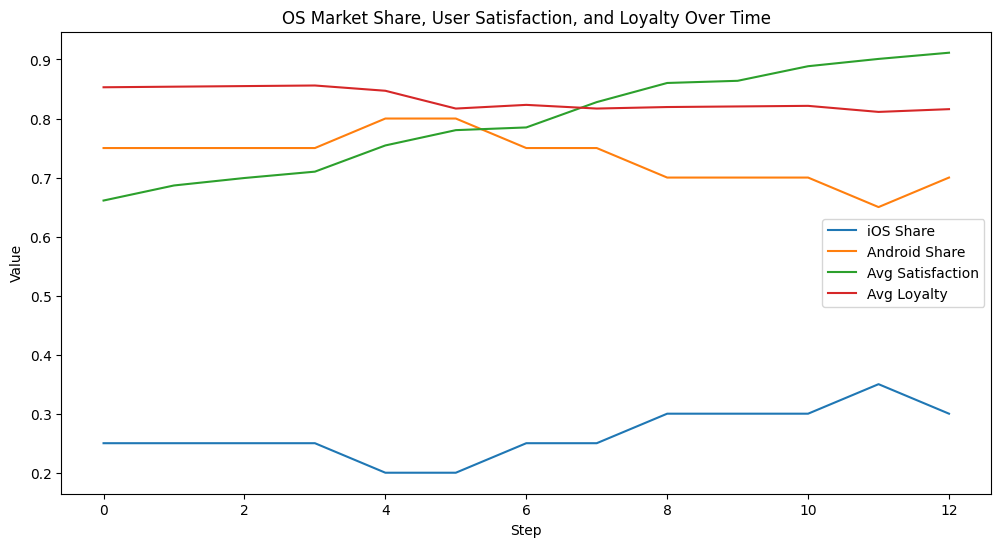

Final OS Statistics:
        Satisfaction             Loyalty                  Age             \
                mean       std      mean       std       mean        std   
OS                                                                         
Android     0.933812  0.084019  0.833497  0.094633  45.428571  16.630437   
iOS         0.859365  0.168403  0.774779  0.158352  41.000000  16.577093   

               Income                
                 mean           std  
OS                                   
Android  57988.856320  19790.354632  
iOS      74224.583393  20034.752229  

OS Switches:
iOS to Android: 4
Android to iOS: 5


In [ ]:
import mesa
import random
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import defaultdict
from llama_index.core.llms import ChatMessage
from llama_index.llms.groq import Groq

# Set up Groq client (you'll need to set your API key)
os.environ["GROQ_API_KEY"] = "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"
llm = Groq(model="llama-3.1-8b-instant")

class UserAgent(mesa.Agent):
    def __init__(self, unique_id, model, os_preference):
        super().__init__(unique_id, model)
        self.os_preference = os_preference
        self.age = random.randint(18, 70)
        self.income = random.gauss(61000 if os_preference == "Android" else 85000, 20000)
        self.satisfaction = random.uniform(0.5, 1)
        self.loyalty = random.uniform(0.7, 1)
        self.time_with_current_os = random.randint(0, 60)  # months

    def step(self):
        self.loyalty = min(1, self.loyalty + 0.001)
        self.satisfaction = min(1, max(0, self.satisfaction + random.uniform(-0.05, 0.1)))
        self.time_with_current_os += 1

        if random.random() > self.loyalty:
            switch_decision = self.get_llm_opinion()
            if "Switch" in switch_decision:
                self.switch_os()

    def get_llm_opinion(self):
        messages = [
            ChatMessage(
                role="system",
                content="You are an AI assistant helping a user decide whether to switch mobile operating systems."
            ),
            ChatMessage(
                role="user",
                content=f"I am a {self.age}-year-old user with an annual income of ${self.income:.0f}. "
                        f"My current OS preference is {self.os_preference}, and my satisfaction level is {self.satisfaction:.2f}. "
                        f"My loyalty score is {self.loyalty:.2f}, and I've been using this OS for {self.time_with_current_os} months. "
                        f"The current market share for iOS is {self.model.ios_share():.2f} and for Android is {self.model.android_share():.2f}. "
                        f"Based on these factors, should I consider switching to the other OS? "
                        f"Provide a brief explanation and a decision (Switch/Stay)."
            )
        ]

        try:
            resp = llm.chat(messages)
            return resp.message.content
        except Exception as e:
            print(f"Error getting LLM opinion: {e}")
            return "Stay"  # Default to staying if there's an error

    def switch_os(self):
        self.os_preference = "iOS" if self.os_preference == "Android" else "Android"
        self.satisfaction = random.uniform(0.6, 1)  # Higher initial satisfaction after switch
        self.loyalty = random.uniform(0.5, 0.8)  # Reset loyalty
        self.time_with_current_os = 0

class OSModel(mesa.Model):
    def __init__(self, N):
        super().__init__()
        self.num_agents = N
        self.schedule = mesa.time.RandomActivation(self)
        self.datacollector = mesa.DataCollector(
            model_reporters={
                "iOS_Share": self.ios_share,
                "Android_Share": self.android_share,
                "Avg_Satisfaction": self.avg_satisfaction,
                "Avg_Loyalty": self.avg_loyalty
            },
            agent_reporters={
                "OS": "os_preference",
                "Satisfaction": "satisfaction",
                "Loyalty": "loyalty",
                "Age": "age",
                "Income": "income"
            }
        )

        # Initialize agents based on 2024 market share data
        ios_count = int(0.2939 * N)
        android_count = N - ios_count

        for i in range(ios_count):
            a = UserAgent(i, self, "iOS")
            self.schedule.add(a)

        for i in range(ios_count, N):
            a = UserAgent(i, self, "Android")
            self.schedule.add(a)

        self.datacollector.collect(self)
        self.month = 0

    def step(self):
        self.schedule.step()
        self.datacollector.collect(self)
        self.month += 1

        # Simulate market events
        if self.month % 12 == 0:  # Annual major OS updates
            self.major_os_update()
        if self.month % 6 == 0:  # Biannual minor updates
            self.minor_os_update()
        if random.random() < 0.05:  # Random events (5% chance each month)
            self.random_market_event()

    def ios_share(self):
        ios_users = sum(1 for agent in self.schedule.agents if agent.os_preference == "iOS")
        return ios_users / self.num_agents

    def android_share(self):
        return 1 - self.ios_share()

    def avg_satisfaction(self):
        return sum(agent.satisfaction for agent in self.schedule.agents) / self.num_agents

    def avg_loyalty(self):
        return sum(agent.loyalty for agent in self.schedule.agents) / self.num_agents

    def major_os_update(self):
        os = random.choice(["iOS", "Android"])
        for agent in self.schedule.agents:
            if agent.os_preference == os:
                agent.satisfaction += random.uniform(0.05, 0.2)
                agent.satisfaction = min(1, agent.satisfaction)

    def minor_os_update(self):
        os = random.choice(["iOS", "Android"])
        for agent in self.schedule.agents:
            if agent.os_preference == os:
                agent.satisfaction += random.uniform(0.01, 0.05)
                agent.satisfaction = min(1, agent.satisfaction)

    def random_market_event(self):
        event = random.choice(["security_issue", "new_feature", "price_change"])
        os = random.choice(["iOS", "Android"])

        if event == "security_issue":
            for agent in self.schedule.agents:
                if agent.os_preference == os:
                    agent.satisfaction -= random.uniform(0.1, 0.3)
                    agent.satisfaction = max(0, agent.satisfaction)
        elif event == "new_feature":
            for agent in self.schedule.agents:
                if agent.os_preference == os:
                    agent.satisfaction += random.uniform(0.05, 0.15)
                    agent.satisfaction = min(1, agent.satisfaction)
        elif event == "price_change":
            price_change = random.uniform(-0.1, 0.1)
            for agent in self.schedule.agents:
                if agent.os_preference == os:
                    agent.satisfaction += price_change
                    agent.satisfaction = max(0, min(1, agent.satisfaction))

# Run the simulation
def run_model(num_agents, num_steps):
    model = OSModel(num_agents)
    for _ in range(num_steps):
        model.step()
    return model

# Analyze and visualize results
def analyze_results(model):
    model_data = model.datacollector.get_model_vars_dataframe()
    agent_data = model.datacollector.get_agent_vars_dataframe()

    plt.figure(figsize=(12, 6))
    plt.plot(model_data.index, model_data["iOS_Share"], label="iOS Share")
    plt.plot(model_data.index, model_data["Android_Share"], label="Android Share")
    plt.plot(model_data.index, model_data["Avg_Satisfaction"], label="Avg Satisfaction")
    plt.plot(model_data.index, model_data["Avg_Loyalty"], label="Avg Loyalty")
    plt.xlabel("Step")
    plt.ylabel("Value")
    plt.title("OS Market Share, User Satisfaction, and Loyalty Over Time")
    plt.legend()
    plt.show()

    final_state = agent_data.xs(model_data.index[-1], level="Step")
    os_stats = final_state.groupby("OS").agg({
        "Satisfaction": ["mean", "std"],
        "Loyalty": ["mean", "std"],
        "Age": ["mean", "std"],
        "Income": ["mean", "std"]
    })
    print("Final OS Statistics:")
    print(os_stats)

    switches = defaultdict(int)
    for agent_id in agent_data.index.get_level_values("AgentID").unique():
        agent_history = agent_data.xs(agent_id, level="AgentID")["OS"]
        for i in range(1, len(agent_history)):
            if agent_history.iloc[i] != agent_history.iloc[i-1]:
                switches[f"{agent_history.iloc[i-1]} to {agent_history.iloc[i]}"] += 1

    print("\nOS Switches:")
    for switch, count in switches.items():
        print(f"{switch}: {count}")

# Run the simulation and analyze results
if __name__ == "__main__":
    num_agents = 20  # Reduced for faster execution, increase for more accurate results
    num_steps = 12  # 1 year (assuming each step is a month)

    model = run_model(num_agents, num_steps)
    analyze_results(model)